In [54]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import preprocessing  

In [2]:
os.chdir(r"C:\Users\Sarkar\Documents\GitHub\ols\Dataset")

In [3]:
os.listdir()

['HousePrices.csv']

In [4]:
house = pd.read_csv("HousePrices.csv")

In [5]:
house.head()

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


* Dwell_Type: Identifies the type of dwelling involved in the sale
     1. 20----------->1-STORY 1946 & NEWER ALL STYLES
     2. 30----------->1-STORY 1945 & OLDER
     3. 40----------->1-STORY W/FINISHED ATTIC ALL AGES
     4. 45----------->1-1/2 STORY - UNFINISHED ALL AGES
     5. 50----------->1-1/2 STORY FINISHED ALL AGES
     6. 60----------->2-STORY 1946 & NEWER
     7. 70----------->2-STORY 1945 & OLDER
     8. 75----------->2-1/2 STORY ALL AGES
     9. 80----------->SPLIT OR MULTI-LEVEL
     10. 85---------->SPLIT FOYER
     11. 90---------->DUPLEX - ALL STYLES AND AGES
     12. 120--------->1-STORY PUD (Planned Unit Development) - 1946 & NEWER
     13. 150--------->1-1/2 STORY PUD - ALL AGES
     14. 160--------->2-STORY PUD - 1946 & NEWER
     15. 180--------->PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
     16. 190--------->2 FAMILY CONVERSION - ALL STYLES AND AGES
     
* Zone_Class: Identifies the general zoning classification of the sale
     1. A----------->Agriculture
     2. C----------->Commercial
     3. FV---------->Floating Village Residential
     4. I----------->Industrial
     5. RH---------->Residential High Density
     6. RL---------->Residential Low Density
     7. RP---------->Residential Low Density Park 
     8. RM---------->Residential Medium Density

* LotFrontage: Linear feet of street-connected to the property

* LotArea: Lot size is the lot or parcel side where it adjoins a street, boulevard or access way

* Road_Type: Type of road access to the property
     1. Grvl----------->Gravel 
     2. Pave----------->Paved

* Alley: Type of alley access to the property
     1. Grvl----------->Gravel
     2. Pave----------->Paved
     3. NA------------->No alley access

* Property_Shape: General shape of the property
     1. Reg----------->Regular 
     2. IR1----------->Slightly irregular
     3. IR2----------->Moderately Irregular
     4. IR3----------->Irregular

* LandContour: Flatness of the property
     1. Lvl----------->Near Flat/Level 
     2. Bnk----------->Banked - Quick and significant rise from street grade to building
     3. HLS----------->Hillside - Significant slope from side to side
     4. Low Depression

* Utilities: Type of utilities available
     1. AllPub----------->All public Utilities (E, G, W and S) 
     2. NoSewr----------->Electricity, Gas, and Water (Septic Tank)
     3. NoSeWa----------->Electricity and Gas Only
     4. ELO-------------->Electricity only 

* LotConfig: Lot configuration
     1. Inside----------->Inside lot
     2. Corner----------->Corner lot
     3. CulDSac---------->Cul-de-sac
     4. FR2-------------->Frontage on 2 sides of property
     5. FR3-------------->Frontage on 3 sides of property

* LandSlope: Slope of property
     1. Gtl----------->Gentle slope
     2. Mod----------->Moderate Slope 
     3. Sev----------->Severe Slope

* Neighborhood: Physical locations within Ames city limits
     1. Blmngtn---------->Bloomington Heights
     2. Blueste---------->Bluestem
     3. BrDale----------->Briardale
     4. BrkSide---------->Brookside
     5. ClearCr---------->Clear Creek
     6. CollgCr---------->College Creek
     7. Crawfor---------->Crawford
     8. Edwards---------->Edwards
     9. Gilbert---------->Gilbert
     10. IDOTRR---------->Iowa DOT and Rail Road
     11. MeadowV--------->Meadow Village
     12. Mitchel--------->Mitchell
     13. Names----------->North Ames
     14. NoRidge--------->Northridge
     15. NPkVill--------->Northpark Villa
     16. NridgHt--------->Northridge Heights
     17. NWAmes---------->Northwest Ames
     18. OldTown--------->Old Town
     19. SWISU----------->South & West of Iowa State University
     20. Sawyer---------->Sawyer
     21. SawyerW--------->Sawyer West
     22. Somerst--------->Somerset
     23. StoneBr--------->Stone Brook
     24. Timber---------->Timberland
     25. Veenker--------->Veenker

* Condition1: Proximity to various conditions
     1. Artery--------->Adjacent to an arterial street
     2. Feedr---------->Adjacent to feeder street 
     3. Norm----------->Normal 
     4. RRNn----------->Within 200' of North-South Railroad
     5. RRAn----------->Adjacent to North-South Railroad
     6. PosN----------->Near positive off-site feature--park, greenbelt, etc.
     7. PosA----------->Adjacent to positive off-site feature
     8. RRNe----------->Within 200' of East-West Railroad
     9. RRAe----------->Adjacent to East-West Railroad

* Condition2: Proximity to various conditions (if more than one is present)
     1. Artery--------->Adjacent to an arterial street
     2. Feedr---------->Adjacent to feeder street 
     3. Norm----------->Normal 
     4. RRNn----------->Within 200' of North-South Railroad
     5. RRAn----------->Adjacent to North-South Railroad
     6. PosN----------->Near positive off-site feature--park, greenbelt, etc.
     7. PosA----------->Adjacent to positive off-site feature
     8. RRNe----------->Within 200' of East-West Railroad
     9. RRAe----------->Adjacent to East-West Railroad

* Dwelling_Type: Type of dwelling
     1. 1Fam------------->Single-family Detached 
     2. 2FmCon----------->Two-family Conversion; originally built as a one-family dwelling
     3. Duplx------------>Duplex
     4. TwnhsE----------->Townhouse End Unit
     5. TwnhsI----------->ownhouse Inside Unit

* HouseStyle: Style of dwelling
     1. 1Story----------->One story
     2. 1.5Fin----------->One and one-half story: 2nd level finished
     3. 1.5Unf----------->One and one-half story: 2nd level unfinished
     4. 2Story----------->Two-story
     5. 2.5Fin----------->Two and one-half story: 2nd level finished
     6. 2.5Unf----------->Two and one-half story: 2nd level unfinished
     7. SFoyer----------->Split Foyer
     8. SLvl------------->Split Level

* OverallQual: Rates the overall material and finish of the house
     1. 10---------->Very Excellent
     2. 9----------->Excellent
     3. 8----------->Very Good
     4. 7----------->Good
     5. 6----------->Above Average
     6. 5----------->Average
     7. 4----------->Below Average
     8. 3----------->Fair
     9. 2----------->Poor
     10. 1---------->Very Poor

* OverallCond: Rates the overall condition of the house
     1. 10---------->Very Excellent
     2. 9----------->Excellent
     3. 8----------->Very Good
     4. 7----------->Good
     5. 6----------->Above Average
     6. 5----------->Average
     7. 4----------->Below Average
     8. 3----------->Fair
     9. 2----------->Poor
     10. 1---------->Very Poor

* YearBuilt: Original construction date

* YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

* RoofStyle: Type of roof
     1. Flat----------->Flat
     2. Gable----------->Gable
     3. Gambrel----------->Gabrel (Barn)
     4. Hip----------->Hip
     5. Mansard----------->Mansard
     6. Shed----------->Shed

* RoofMatl: Roof material
     1. ClyTile----------->Clay or Tile
     2. CompShg----------->Standard (Composite) Shingle
     3. Membran----------->Membrane
     4. Metal------------->Metal
     5. Roll-------------->Roll
     6. Tar&Grv----------->Gravel & Tar
     7. WdShake----------->Wood Shakes
     8. WdShngl----------->Wood Shingles

* Exterior1st: Exterior covering on the house
     1. AsbShng----------->Asbestos Shingles
     2. AsphShn----------->Asphalt Shingles
     3. BrkComm----------->Brick Common
     4. BrkFace----------->Brick Face
     5. CBlock------------>Cinder Block
     6. CemntBd----------->Cement Board
     7. HdBoard----------->Hard Board
     8. ImStucc----------->Imitation Stucco
     9. MetalSd----------->Metal Siding
     10. Other------------>Other
     11. Plywood---------->Plywood
     12. PreCast---------->PreCast 
     13. Stone------------>Stone
     14. Stucco----------->Stucco
     15. VinylSd---------->Vinyl Siding
     16. Wd Sdng---------->Wood Siding
     17. WdShing---------->Wood Shingles

* Exterior2nd: Exterior covering on the house (if more than one material)
     1. AsbShng----------->Asbestos Shingles
     2. AsphShn----------->Asphalt Shingles
     3. BrkComm----------->Brick Common
     4. BrkFace----------->Brick Face
     5. CBlock------------>Cinder Block
     6. CemntBd----------->Cement Board
     7. HdBoard----------->Hard Board
     8. ImStucc----------->Imitation Stucco
     9. MetalSd----------->Metal Siding
     10. Other------------>Other
     11. Plywood---------->Plywood
     12. PreCast---------->PreCast
     13. Stone------------>Stone
     14. Stucco----------->Stucco
     15. VinylSd---------->Vinyl Siding
     16. Wd Sdng---------->Wood Siding
     17. WdShing---------->Wood Shingles

* MasVnrType: Masonry veneer type
     1. BrkCmn----------->Brick Common
     2. BrkFace---------->Brick Face
     3. CBlock----------->Cinder Block
     4. None------------->None
     5. Stone------------>Stone

* MasVnrArea: Masonry veneer area in square feet

* ExterQual: Evaluates the quality of the material on the exterior
     1. Ex----------->Excellent
     2. Gd----------->Good
     3. TA----------->Average/Typical
     4. Fa----------->Fair
     5. Po----------->Poor

* ExterCond: Evaluates the present condition of the material on the exterior
     1. Ex----------->Excellent
     2. Gd----------->Good
     3. TA----------->Average/Typical
     4. Fa----------->Fair
     5. Po----------->Poor

* Foundation: Type of foundation
     1. BrkTil--------->Brick & Tile
     2. CBlock--------->Cinder Block
     3. PConc---------->Poured Concrete 
     4. Slab----------->Slab
     5. Stone---------->Stone
     6. Wood----------->Wood

* BsmtQual: Evaluates the height of the basement
     1. Ex----------->Excellent (100+ inches) 
     2. Gd----------->Good (90-99 inches)
     3. TA----------->Typical (80-89 inches)
     4. Fa----------->Fair (70-79 inches)
     5. Po----------->Poor (<70 inches
     6. NA----------->No Basement

* BsmtCond: Evaluates the general condition of the basement
     1. Ex----------->Excellent
     2. Gd----------->Good
     3. TA----------->Typical - slight dampness allowed
     4. Fa----------->Fair - dampness or some cracking or settling
     5. Po----------->Poor - Severe cracking, settling, or wetness
     6. NA----------->No Basement

* BsmtExposure: Refers to walkout or garden level walls
     1. Gd----------->Good Exposure
     2. Av----------->Average Exposure (split levels or foyers typically score average or above) 
     3. Mn----------->Minimum Exposure
     4. No----------->No Exposure
     5. NA----------->No Basement

* BsmtFinType1: Rating of basement finished area
     1. GLQ----------->Good Living Quarters
     2. ALQ----------->Average Living Quarters
     3. BLQ----------->Below Average Living Quarters 
     4. Rec----------->Average Rec Room
     5. LwQ----------->Low Quality
     6. Unf----------->Unfinished
     7. NA------------>No Basement

* BsmtFinSF1: Type 1 finished square feet

* BsmtFinType2: Rating of basement finished area (if multiple types)
     1. GLQ----------->Good Living Quarters
     2. ALQ----------->Average Living Quarters
     3. BLQ----------->Below Average Living Quarters 
     4. Rec----------->Average Rec Room
     5. LwQ----------->Low Quality
     6. Unf----------->Unfinished
     7. NA------------>No Basement

* BsmtFinSF2: Type 2 finished square feet

* BsmtUnfSF: Unfinished square feet of the basement area

* TotalBsmtSF: Total square feet of the basement area

* Heating: Type of heating
     1. Floor---------->Floor Furnace
     2. GasA----------->Gas forced warm air furnace
     3. GasW----------->Gas hot water or steam heat
     4. Grav----------->Gravity furnace 
     5. OthW----------->Hot water or steam heat other than gas
     6. Wall----------->Wall furnace

* HeatingQC: Heating quality and condition
     1. Ex----------->Excellent
     2. Gd----------->Good
     3. TA----------->Average/Typical
     4. Fa----------->Fair
     5. Po----------->Poor

* CentralAir: Central air conditioning
     1. N----------->No
     2. Y----------->Yes

* Electrical: Electrical system
     1. SBrkr----------->Standard Circuit Breakers & Romex
     2. FuseA----------->Fuse Box over 60 AMP and all Romex wiring (Average) 
     3. FuseF----------->60 AMP Fuse Box and mostly Romex wiring (Fair)
     4. FuseP----------->60 AMP Fuse Box and mostly knob & tube wiring (poor)
     5. Mix------------->Mixed
     
* 1stFlrSF: First Floor square feet

* 2ndFlrSF: Second floor square feet

* LowQualFinSF: Low quality finished square feet (all floors)

* GrLivArea: Above grade (ground) living area square feet

* BsmtFullBath: Basement full bathrooms

* BsmtHalfBath: Basement half bathrooms

* FullBath: Full bathrooms above grade

* HalfBath: Half baths above grade

* Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

* Kitchen: Kitchens above grade

* KitchenQual: Kitchen quality
     1. Ex----------->Excellent
     2. Gd----------->Good
     3. TA----------->Typical/Average
     4. Fa----------->Fair
     5. Po----------->Poor

* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

* Functional: Home functionality (Assume typical unless deductions are warranted)
     1. Typ----------->Typical Functionality
     2. Min1---------->Minor Deductions 1
     3. Min2---------->Minor Deductions 2
     4. Mod----------->Moderate Deductions
     5. Maj1---------->Major Deductions 1
     6. Maj2---------->Major Deductions 2
     7. Sev----------->Severely Damaged
     8. Sal----------->Salvage only

* Fireplaces: Number of fireplaces

* FireplaceQu: Fireplace quality
     1. Ex----------->Excellent - Exceptional Masonry Fireplace
     2. Gd----------->Good - Masonry Fireplace in the main level
     3. TA----------->Average - Prefabricated Fireplace in the main living area or Masonry Fireplace in basement
     4. Fa----------->Fair - Prefabricated Fireplace in a basement
     5. Po----------->Poor - Ben Franklin Stove
     6. NA----------->No Fireplace

* GarageType: Garage location
     1. 2Types----------->More than one type of garage
     2. Attchd----------->Attached to the home
     3. Basment---------->Basement Garage
     4. BuiltIn---------->Built-In (Garage part of the house - typically has hte room above garage)
     5. CarPort---------->Car Port
     6. Detchd----------->Detached from home
     7. NA--------------->No Garage

* GarageYrBlt: Year garage was built

* GarageFinish: Interior finish of the garage
     1. Fin----------->Finished
     2. RFn----------->Rough Finished 
     3. Unf----------->Unfinished
     4. NA------------>No Garage

* GarageCars: Size of garage in car capacity

* GarageArea: Size of garage in square feet

* GarageQual: Garage quality
     1. Ex----------->Excellent
     2. Gd----------->Good
     3. TA----------->Typical/Average
     4. Fa----------->Fair
     5. Po----------->Poor
     6. NA----------->No Garage

* GarageCond: Garage condition
     1. Ex----------->Excellent
     2. Gd----------->Good
     3. TA----------->Typical/Average
     4. Fa----------->Fair
     5. Po----------->Poor
     6. NA----------->No Garage

* PavedDrive: Paved driveway
     1. Y----------->Paved 
     2. P----------->Partial Pavement
     3. N----------->Dirt/Gravel

* WoodDeckSF: Wood deck area in square feet

* OpenPorchSF: Open porch area in square feet

* EnclosedPorch: Enclosed porch area in square feet

* 3SsnPorch: Three season porch area in square feet

* ScreenPorch: Screen porch area in square feet

* PoolArea: Pool area in square feet

* PoolQC: Pool quality
     1. Ex----------->Excellent
     2. Gd----------->Good
     3. TA----------->Average/Typical
     4. Fa----------->Fair
     5. NA----------->No Pool

* Fence: Fence quality
     1. GdPrv---------->Good Privacy
     2. MnPrv---------->Minimum Privacy
     3. GdWo----------->Good Wood
     4. MnWw----------->Minimum Wood/Wire
     5. NA------------->No Fence

* MiscFeature: Miscellaneous feature not covered in other categories
     1. Elev----------->Elevator
     2. Gar2----------->2nd Garage (if not described in garage section)
     3. Othr----------->Other
     4. Shed----------->Shed (over 100 SF)
     5. TenC----------->Tennis Court
     6. NA------------->None

* MiscVal: Value of miscellaneous feature

* MoSold: Month Sold (MM)

* YrSold: Year Sold (YYYY)

* SaleType: Type of sale
     1. WD-------------->Warranty Deed - Conventional
     2. CWD------------->Warranty Deed - Cash
     3. VWD------------->Warranty Deed - VA Loan
     4. New------------->Home just constructed and sold
     5. COD------------->Court Officer Deed/Estate
     6. Con------------->Contract 15% Down payment regular terms
     7. ConLw----------->Contract Low Down payment and low interest
     8. ConLI----------->Contract Low Interest
     9. ConLD----------->Contract Low Down
     10. Oth------------>Other

* SaleCondition: Condition of sale
     1. Normal------------>Normal Sale
     2. Abnorml----------->Abnormal Sale - trade, foreclosure, short sale
     3. AdjLand----------->Adjoining Land Purchase
     4. Alloca------------>Allocation - two linked properties with separate deeds, typically condo with a garage unit 
     5. Family------------>Sale between family members
     6. Partial----------->Home was not completed when last assessed (associated with New Homes)

* Property_Sale_Price: Price of the house (target variable)

In [6]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 81 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2073 non-null   int64  
 1   Dwell_Type           2073 non-null   int64  
 2   Zone_Class           2073 non-null   object 
 3   LotFrontage          1753 non-null   float64
 4   LotArea              2073 non-null   int64  
 5   Road_Type            2073 non-null   object 
 6   Alley                129 non-null    object 
 7   Property_Shape       2073 non-null   object 
 8   LandContour          2073 non-null   object 
 9   Utilities            2073 non-null   object 
 10  LotConfig            2073 non-null   object 
 11  LandSlope            2073 non-null   object 
 12  Neighborhood         2073 non-null   object 
 13  Condition1           2073 non-null   object 
 14  Condition2           2073 non-null   object 
 15  Dwelling_Type        2073 non-null   o

In [7]:
house.drop(columns=["Id"],inplace=True)

In [8]:
def missing_function(df):
    nul=[]
    c=[]
    b=[]
    for i in df.columns:
        a=(df[i].isnull().sum()/df.shape[0])*100
        nul.append(a)
    for j in range(0,len(nul)):
         if nul[j]>0:
                c.append(df.columns[j])
                b.append(nul[j])
    nul_tab=pd.DataFrame({"Colum_ name":c,
                 "Null_Data_%":b})
    return nul_tab

In [9]:
missing_function(house)

,Colum_ name,Null_Data_%
0,LotFrontage,15.436565
1,Alley,93.777135
2,MasVnrType,0.675350
3,MasVnrArea,0.675350
4,BsmtQual,2.846117
5,BsmtCond,2.846117
6,BsmtExposure,2.942595
7,BsmtFinType1,2.846117
8,BsmtFinType2,2.894356
9,Electrical,0.048239


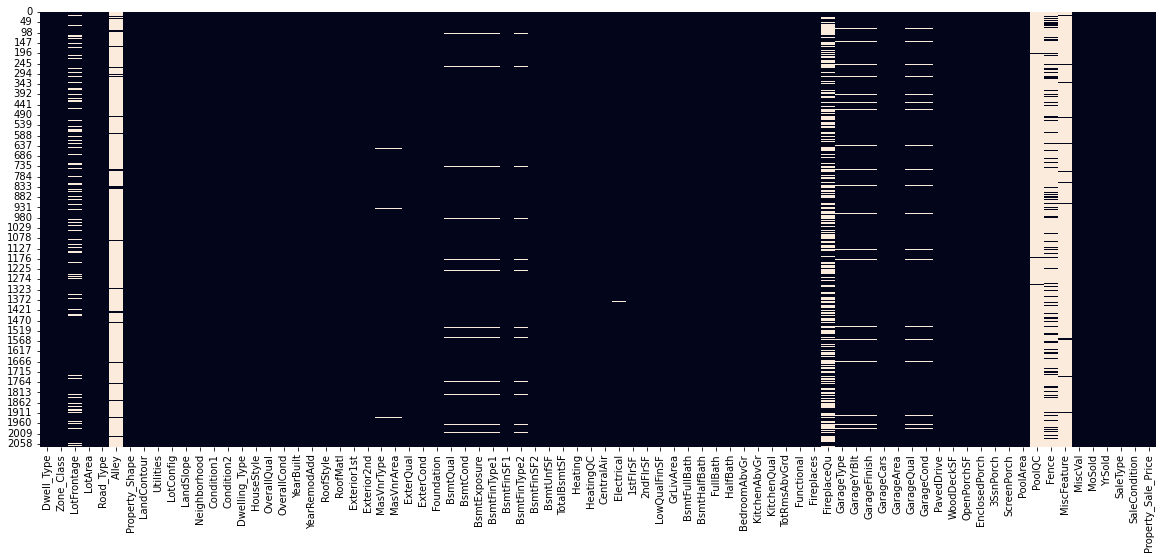

In [10]:
plt.figure(figsize=(20,8))
sns.heatmap(house.isnull(),cbar=False)
plt.show()

<AxesSubplot:xlabel='MasVnrType'>

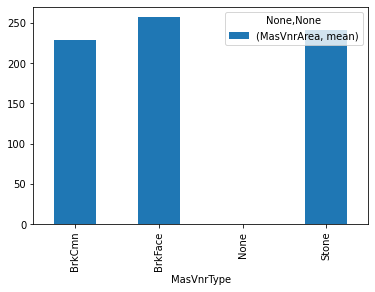

In [11]:
#MasVnrType
#MasVnrArea
house.groupby(['MasVnrType']).agg({"MasVnrArea":["mean"]}).plot(kind='bar')

<AxesSubplot:xlabel='Exterior2nd,Exterior1st,MasVnrType'>

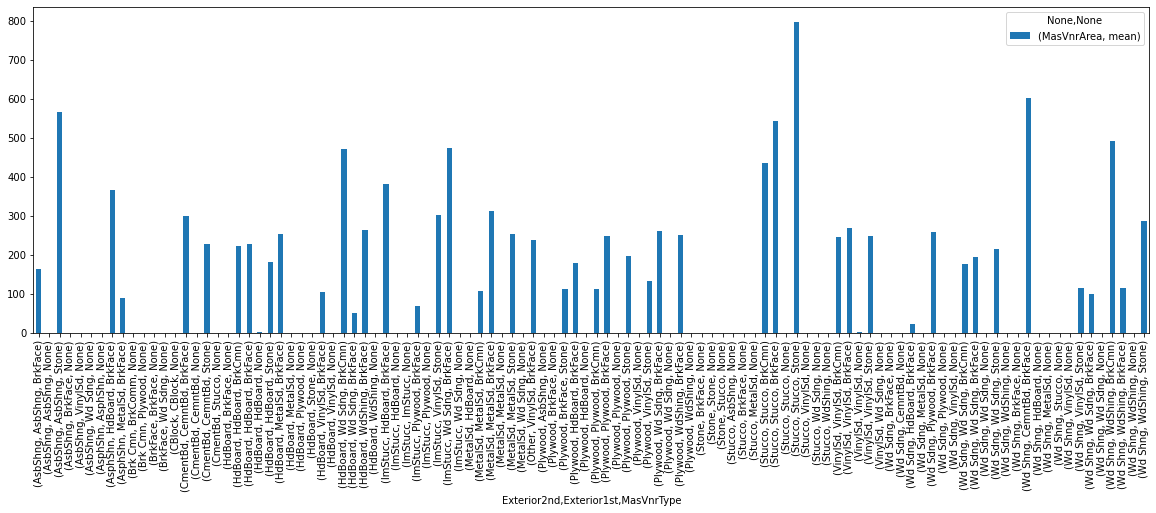

In [12]:
house.groupby(["Exterior2nd","Exterior1st","MasVnrType"]).agg({"MasVnrArea":["mean"]}).plot(kind='bar',figsize=(20,6))

In [13]:
print(house[["Exterior2nd","Exterior1st","MasVnrType","MasVnrArea"]][(house["Exterior2nd"]=="VinylSd") & (house["Exterior1st"]=="VinylSd") & (house["MasVnrType"]=='None') & (house["MasVnrArea"]>0)])
print(house[["Exterior2nd","Exterior1st","MasVnrType","MasVnrArea"]][(house["Exterior2nd"]=="HdBoard") & (house["Exterior1st"]=="HdBoard") & (house["MasVnrType"]=='None') & (house["MasVnrArea"]>0)])

     Exterior2nd Exterior1st MasVnrType  MasVnrArea
624      VinylSd     VinylSd       None       288.0
1300     VinylSd     VinylSd       None       344.0
     Exterior2nd Exterior1st MasVnrType  MasVnrArea
1334     HdBoard     HdBoard       None       312.0


In [14]:
i=house[(house["Exterior2nd"]=="VinylSd") & (house["Exterior1st"]=="VinylSd") & (house["MasVnrType"]=='None') & (house["MasVnrArea"]>0)].index
house.drop(i,inplace=True)
j=house[(house["Exterior2nd"]=="HdBoard") & (house["Exterior1st"]=="HdBoard") & (house["MasVnrType"]=='None') & (house["MasVnrArea"]>0)].index
house.drop(j,inplace=True)

In [15]:
house["MasVnrType"].fillna('None',inplace=True)
house["MasVnrArea"].fillna(0, inplace=True)

In [16]:
house["Alley"].fillna('No_alley_access',inplace=True)

<AxesSubplot:xlabel='LotConfig'>

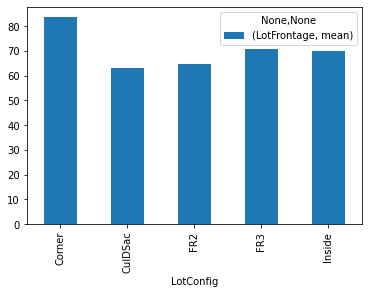

In [17]:
#LotFrontage , LotConfig
house.groupby(['LotConfig']).agg({"LotFrontage":["mean"]}).plot(kind='bar')

In [18]:
house['LotFrontage'] = house['LotFrontage'].fillna(house.groupby(['LotConfig'])['LotFrontage'].transform('mean'))

In [19]:
#GarageType , GarageYrBlt , GarageFinish , GarageQual , GarageCond
house[['Dwell_Type','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']][(house["GarageType"].isna()) | (house["GarageYrBlt"].isna()) | (house["GarageFinish"].isna()) | (house["GarageQual"].isna()) | (house["GarageCond"].isna())]

,Dwell_Type,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
39,90,NaN,NaN,NaN,NaN,NaN
48,190,NaN,NaN,NaN,NaN,NaN
78,90,NaN,NaN,NaN,NaN,NaN
88,50,NaN,NaN,NaN,NaN,NaN
89,20,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1966,90,NaN,NaN,NaN,NaN,NaN
1985,190,NaN,NaN,NaN,NaN,NaN
1993,160,NaN,NaN,NaN,NaN,NaN
2048,90,NaN,NaN,NaN,NaN,NaN


In [20]:
house['GarageType'].fillna('No_Garage',inplace=True)
house['GarageYrBlt'].fillna(0,inplace=True)
house['GarageFinish'].fillna('No_Garage',inplace=True)
house['GarageQual'].fillna('No_Garage',inplace=True)
house['GarageCond'].fillna('No_Garage',inplace=True)

In [21]:
# Fireplaces , FireplaceQu

house[['Fireplaces','FireplaceQu']][(house["FireplaceQu"].isna()) & (house["Fireplaces"]==0)]

,Fireplaces,FireplaceQu
0,0,NaN
5,0,NaN
10,0,NaN
12,0,NaN
15,0,NaN
...,...,...
2065,0,NaN
2067,0,NaN
2069,0,NaN
2070,0,NaN


In [22]:
house['FireplaceQu'].fillna('No_Fireplace',inplace=True)

In [23]:
# BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF
house[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',"BsmtFinSF1","BsmtFinSF2","BsmtUnfSF"]][(house["BsmtQual"].isna()) | (house["BsmtCond"].isna()) | (house["BsmtExposure"].isna()) | (house["BsmtFinType1"].isna()) | (house["BsmtFinType2"].isna())]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF
17,NaN,NaN,NaN,NaN,NaN,0,0,0
39,NaN,NaN,NaN,NaN,NaN,0,0,0
90,NaN,NaN,NaN,NaN,NaN,0,0,0
102,NaN,NaN,NaN,NaN,NaN,0,0,0
156,NaN,NaN,NaN,NaN,NaN,0,0,0
...,...,...,...,...,...,...,...,...
2000,NaN,NaN,NaN,NaN,NaN,0,0,0
2003,NaN,NaN,NaN,NaN,NaN,0,0,0
2004,NaN,NaN,NaN,NaN,NaN,0,0,0
2021,NaN,NaN,NaN,NaN,NaN,0,0,0


In [24]:
house['BsmtQual'].fillna('No_Basement',inplace=True)
house['BsmtCond'].fillna('No_Basement',inplace=True)
house['BsmtExposure'].fillna('No_Basement',inplace=True)
house['BsmtFinType1'].fillna('No_Basement',inplace=True)
house['BsmtFinType2'].fillna('No_Basement',inplace=True)

In [25]:
a=house[house['Electrical'].isna()].index
house.drop(a,inplace=True)

In [26]:
#PoolArea,PoolQC
house[['PoolArea','PoolQC']][(house['PoolQC'].isna())]

,PoolArea,PoolQC
0,0,NaN
1,0,NaN
2,0,NaN
3,0,NaN
4,0,NaN
...,...,...
2068,0,NaN
2069,0,NaN
2070,0,NaN
2071,0,NaN


In [27]:
house['PoolQC'].fillna('No_Pool',inplace=True)

In [28]:
house['Fence'].fillna('No_Fence',inplace=True)

In [29]:
house['MiscFeature'].fillna('None',inplace=True)

In [30]:
house.head()

,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,60,RL,65.0,8450,Pave,No_alley_access,Reg,Lvl,AllPub,Inside,...,0,No_Pool,No_Fence,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,No_alley_access,Reg,Lvl,AllPub,FR2,...,0,No_Pool,No_Fence,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,No_alley_access,IR1,Lvl,AllPub,Inside,...,0,No_Pool,No_Fence,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,No_alley_access,IR1,Lvl,AllPub,Corner,...,0,No_Pool,No_Fence,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,No_alley_access,IR1,Lvl,AllPub,FR2,...,0,No_Pool,No_Fence,None,0,12,2008,WD,Normal,250000


In [31]:
numeric_data = house.select_dtypes(include=[np.number])
categorical_data = house.select_dtypes(exclude=[np.number])

In [32]:
def univaritate_num(data):
    mis=[]
    Mea=[]
    Med=[]
    SD=[]
    Var=[]
    Min=[]
    Max=[]
    Ran=[]
    Q1=[]
    Q2=[]
    Q3=[]
    Skew=[]
    Kur=[]
    col=data.columns
    for x in data.columns:
        mis.append(data[x].isnull().sum())
        Mea.append(round(data[x].mean(),2))
        Med.append(round(data[x].median(),2))
        SD.append(round(data[x].std(),2))
        Var.append(round(data[x].var(),2))
        Min.append(round(data[x].min(),2))
        Max.append(round(data[x].max(),2))
        Ran.append(round((data[x].max()-data[x].min()),2))
        Q1.append(data[x].quantile(.25))
        Q2.append(data[x].quantile(.50))
        Q3.append(data[x].quantile(.75))
        Skew.append(round(data[x].skew(),2))
        Kur.append(round(data[x].kurt(),2))
    nul_tab=pd.DataFrame({"Colum_ name":col,"Total missing value":mis,"Mean":Mea,
               "Median":Med,"Standard Deviation":SD,
               "Variance":Var,"Minimum value":Min,
               "Maximum value":Max,"Range":Ran,
               "Q1":Q1,"Q2":Q2,"Q3":Q3,
               "Skewness":Skew,"Kurtosis":Kur})
    return nul_tab

In [33]:
univaritate_num(numeric_data)

,Colum_ name,Total missing value,Mean,Median,Standard Deviation,Variance,Minimum value,Maximum value,Range,Q1,Q2,Q3,Skewness,Kurtosis
0,Dwell_Type,0,60.50,50.00,160.06,2.562045e+04,20.0,7080.0,7060.0,20.0,50.000000,70.0,40.85,1790.76
1,LotFrontage,0,72.04,70.14,25.90,6.706700e+02,21.0,313.0,292.0,60.0,70.142749,82.0,3.69,31.69
2,LotArea,0,10722.50,9490.00,9223.03,8.506436e+07,1300.0,215245.0,213945.0,7620.0,9490.000000,11606.0,11.23,196.53
3,OverallQual,0,6.23,6.00,1.52,2.300000e+00,1.0,10.0,9.0,5.0,6.000000,7.0,0.19,-0.52
4,OverallCond,0,5.84,5.00,1.36,1.850000e+00,1.0,9.0,8.0,5.0,5.000000,7.0,0.65,-0.02
5,YearBuilt,0,1969.41,1971.00,30.23,9.141000e+02,1872.0,2010.0,138.0,1950.0,1971.000000,1999.0,-0.51,-0.59
6,YearRemodAdd,0,1986.62,1995.00,20.44,4.177900e+02,1950.0,2023.0,73.0,1970.0,1995.000000,2004.0,-0.58,-1.07
7,MasVnrArea,0,100.93,0.00,178.73,3.194427e+04,0.0,1600.0,1600.0,0.0,0.000000,160.0,2.60,9.22
8,BsmtFinSF1,0,437.97,381.00,448.27,2.009443e+05,0.0,5644.0,5644.0,0.0,381.000000,708.0,1.47,8.51
9,BsmtFinSF2,0,49.31,0.00,165.77,2.747883e+04,0.0,1474.0,1474.0,0.0,0.000000,0.0,4.02,17.55


In [34]:
def univariate_cat(data):
    mis=[]
    unique_cnt=[]
    unique_cat=[]
    col=data.columns
    for x in data.columns:
        mis.append(data[x].isnull().sum())
        unique_cnt.append(data[x].nunique())
        unique_cat.append(list(data[x].unique()))
    nul_tab=pd.DataFrame({"Colum_ name":col,"Total_missing":mis,
                          "Count_of_unique_cat":unique_cnt,
                          "Unique_cat":unique_cat})
    return nul_tab

In [35]:
univariate_cat(categorical_data)

,Colum_ name,Total_missing,Count_of_unique_cat,Unique_cat
0,Zone_Class,0,5,"[RL, RM, C (all), FV, RH]"
1,Road_Type,0,2,"[Pave, Grvl]"
2,Alley,0,3,"[No_alley_access, Grvl, Pave]"
3,Property_Shape,0,4,"[Reg, IR1, IR2, IR3]"
4,LandContour,0,4,"[Lvl, Bnk, Low, HLS]"
5,Utilities,0,2,"[AllPub, NoSeWa]"
6,LotConfig,0,5,"[Inside, FR2, Corner, CulDSac, FR3]"
7,LandSlope,0,3,"[Gtl, Mod, Sev]"
8,Neighborhood,0,25,"[CollgCr, Veenker, Crawfor, NoRidge, Mitchel, ..."
9,Condition1,0,9,"[Norm, Feedr, PosN, Artery, RRAe, RRNn, RRAn, ..."


In [36]:
numeric_data.describe(percentiles=[0.01,0.02,.25,.50,.75,.97,.98,.99]).T

,count,mean,std,min,1%,2%,25%,50%,75%,97%,98%,99%,max
Dwell_Type,2069.0,60.499275,160.063882,20.0,20.00,20.00,20.0,50.000000,70.0,160.00,190.00,190.00,7080.0
LotFrontage,2069.0,72.037614,25.897326,21.0,21.00,24.00,60.0,70.142749,82.0,115.00,121.00,141.96,313.0
LotArea,2069.0,10722.496375,9223.034244,1300.0,1883.28,2268.00,7620.0,9490.000000,11606.0,26081.88,32310.36,40954.12,215245.0
OverallQual,2069.0,6.234413,1.517995,1.0,3.00,4.00,5.0,6.000000,7.0,9.00,9.00,9.00,10.0
OverallCond,2069.0,5.836153,1.361152,1.0,3.00,4.00,5.0,5.000000,7.0,9.00,9.00,9.00,9.0
YearBuilt,2069.0,1969.412276,30.234123,1872.0,1900.00,1905.36,1950.0,1971.000000,1999.0,2007.00,2008.00,2009.00,2010.0
YearRemodAdd,2069.0,1986.616723,20.439928,1950.0,1950.00,1950.00,1970.0,1995.000000,2004.0,2009.00,2011.64,2017.00,2023.0
MasVnrArea,2069.0,100.927018,178.729602,0.0,0.00,0.00,0.0,0.000000,160.0,571.00,651.00,777.12,1600.0
BsmtFinSF1,2069.0,437.971484,448.268110,0.0,0.00,0.00,0.0,381.000000,708.0,1351.00,1438.56,1572.32,5644.0
BsmtFinSF2,2069.0,49.314645,165.767403,0.0,0.00,0.00,0.0,0.000000,0.0,557.00,670.00,849.96,1474.0


In [37]:
b=house[house['Dwell_Type']==7080.0].index
house.drop(b,inplace=True)

In [38]:
b=numeric_data[numeric_data['Dwell_Type']==7080.0].index
numeric_data.drop(b,inplace=True)

In [39]:
b=numeric_data[numeric_data['LotArea']==215245.0].index
numeric_data.drop(b,inplace=True)

In [40]:
b=house[house['LotArea']==215245.0].index
house.drop(b,inplace=True)

In [41]:
numeric_data = house.select_dtypes(include=[np.number])
categorical_data = house.select_dtypes(exclude=[np.number])

In [42]:
def generate_countplots(df):
    variables = list(df.columns)
    for var in variables:
        sns.countplot(x=var, data=df)
        plt.title(f"Countplot of {var}")
        plt.xticks(rotation = 45)
        plt.show()

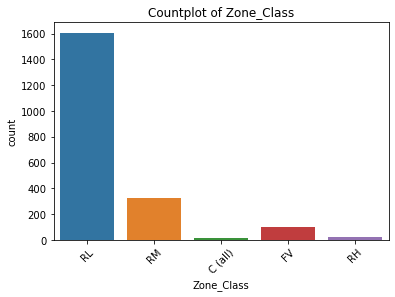

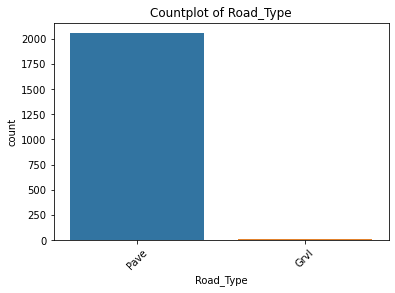

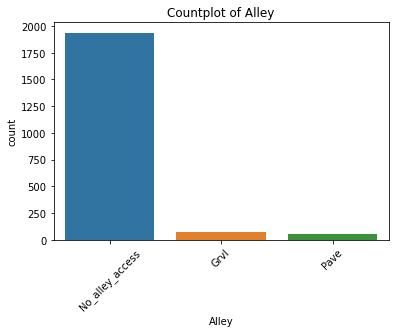

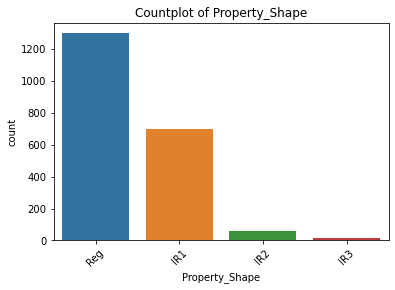

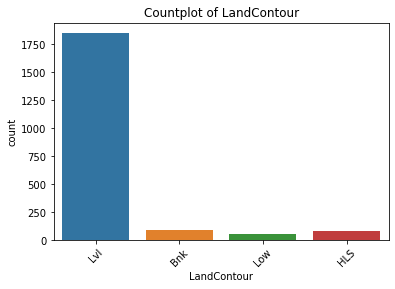

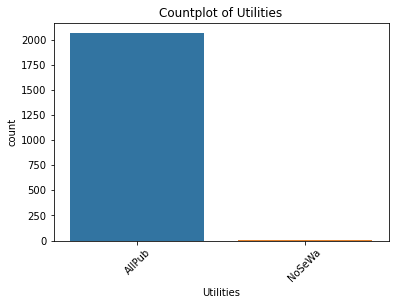

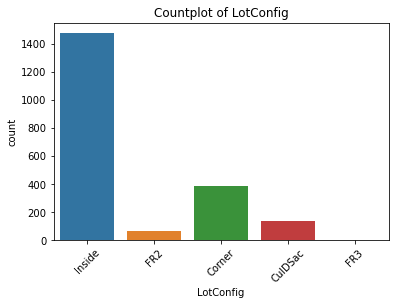

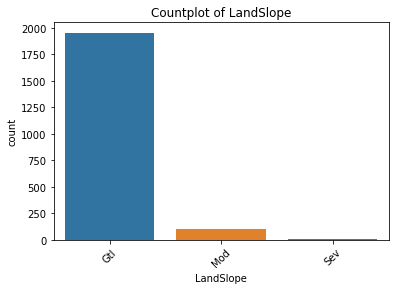

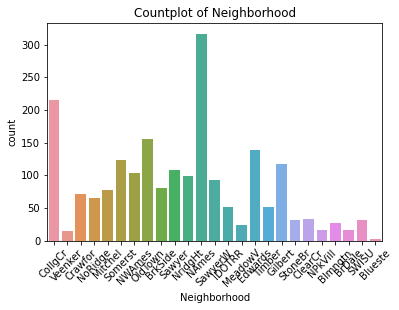

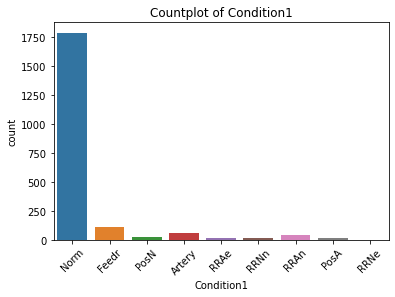

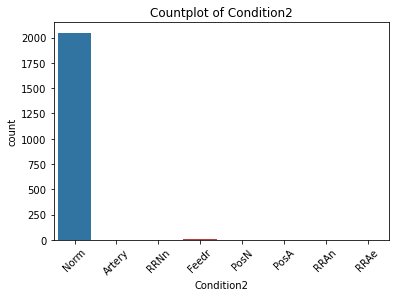

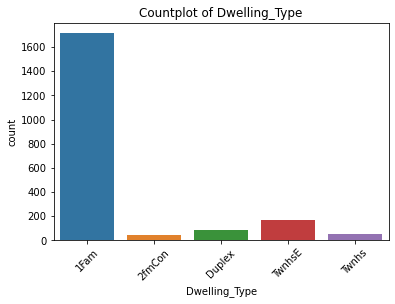

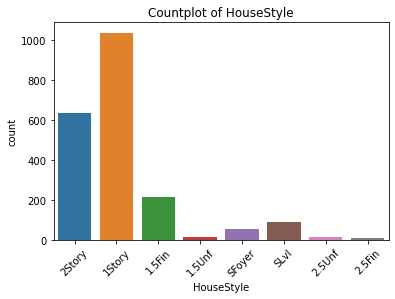

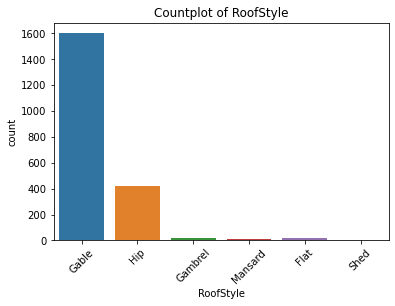

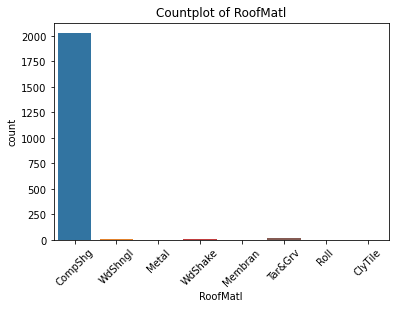

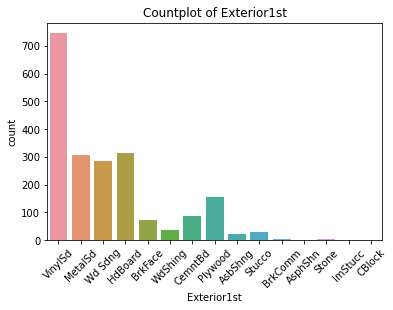

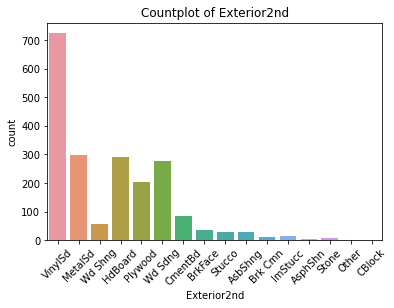

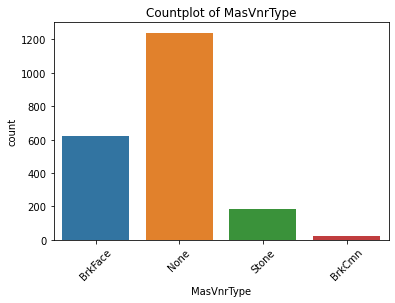

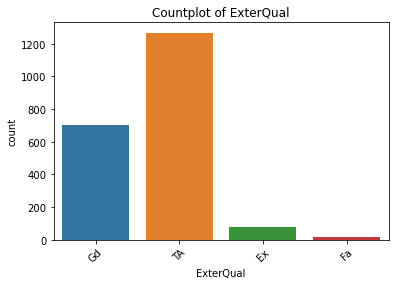

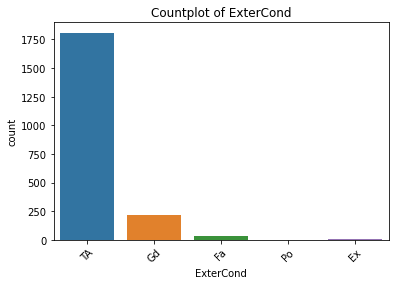

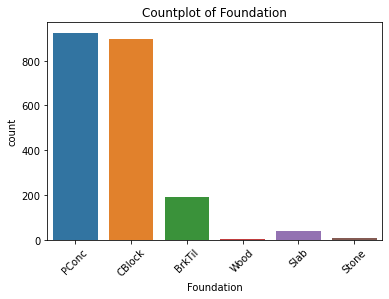

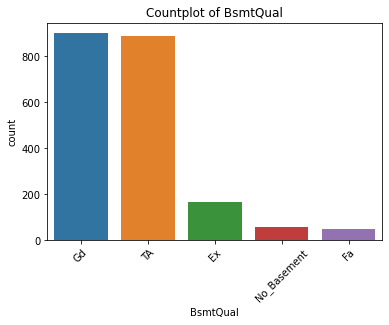

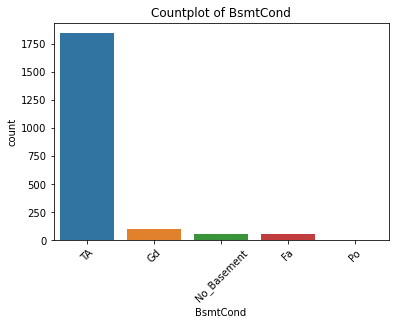

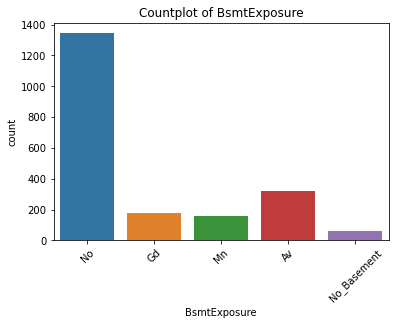

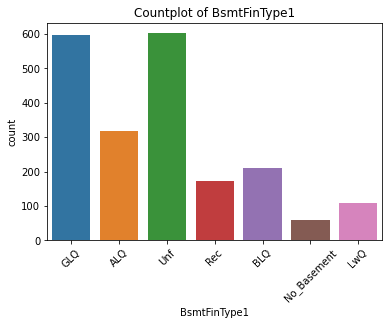

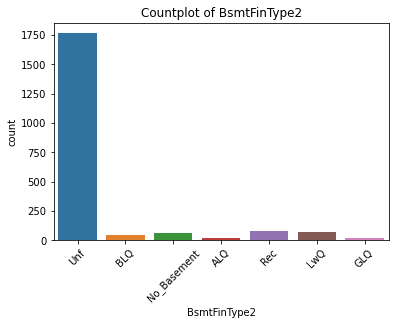

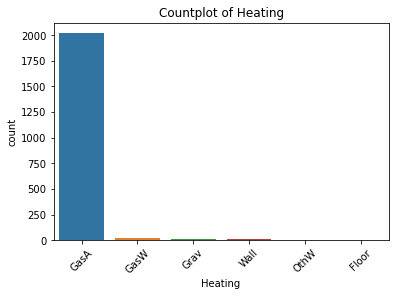

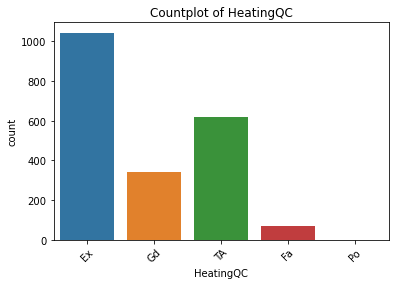

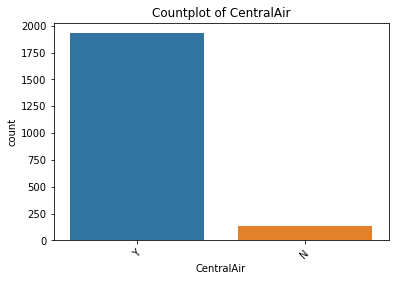

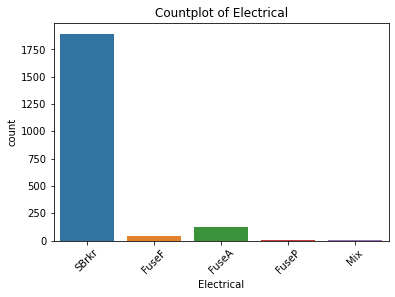

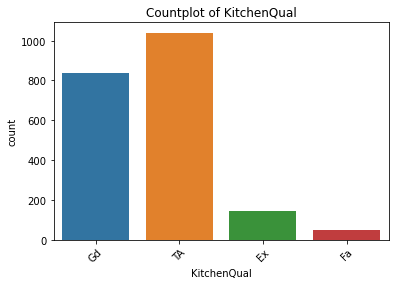

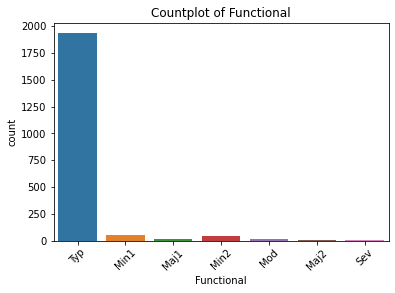

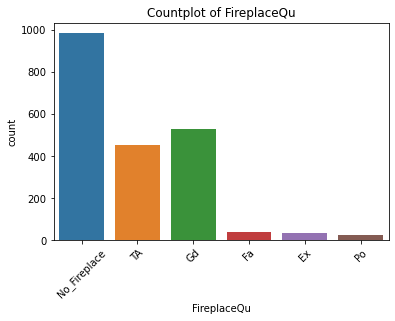

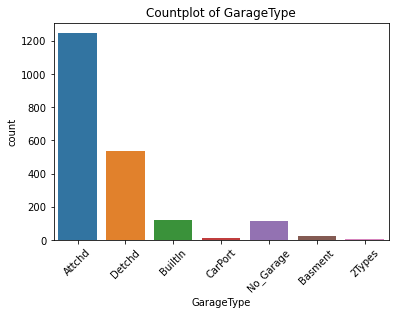

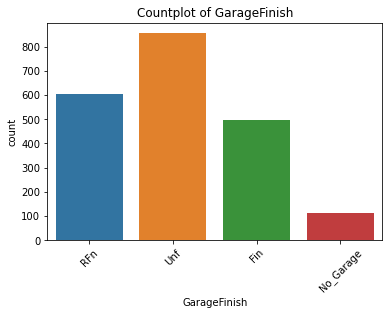

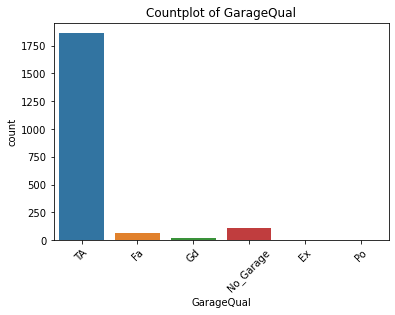

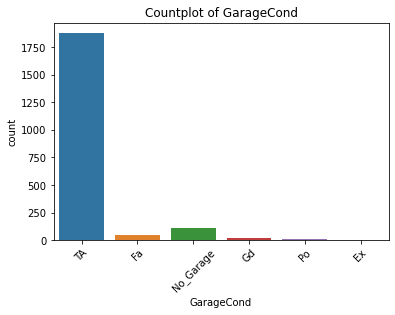

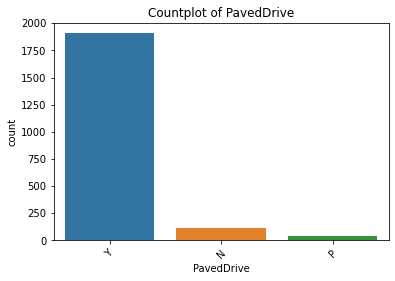

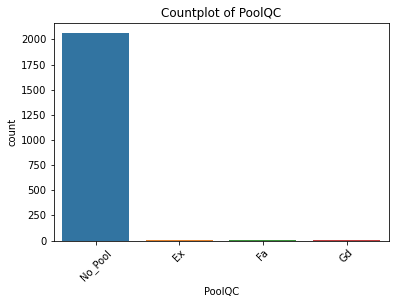

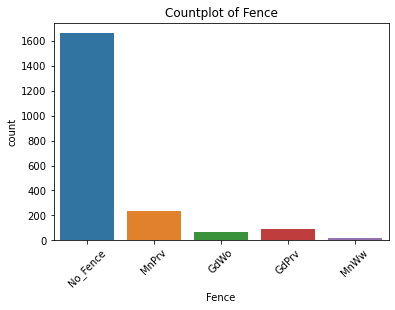

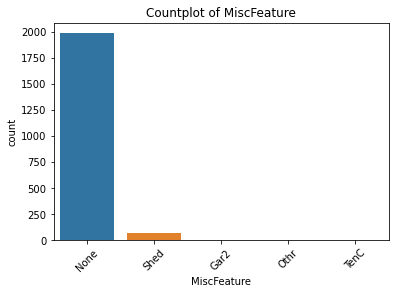

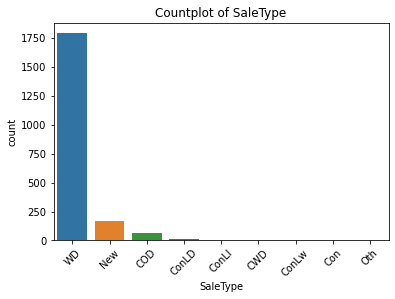

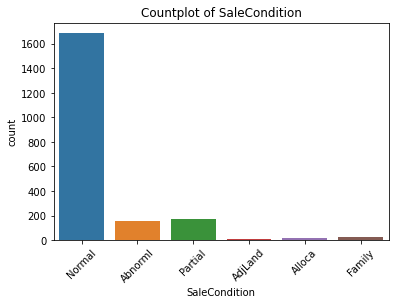

In [43]:
generate_countplots(categorical_data)

In [44]:
def generate_boxplot(df):
    variables = list(df.columns)
    for var in variables:
        sns.boxplot(x=var, data=df)
        plt.title(f"Countplot of {var}")
        plt.xticks(rotation = 45)
        plt.show()

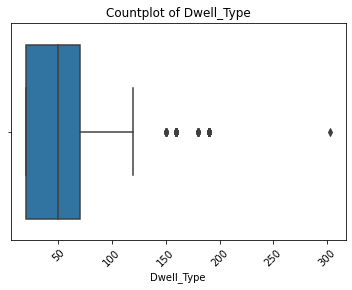

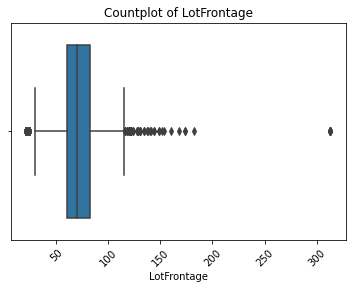

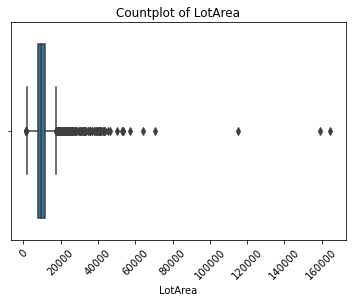

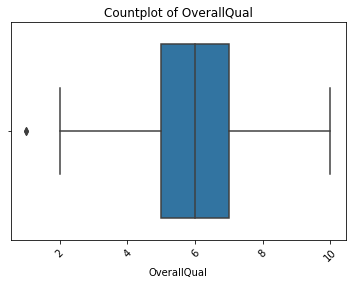

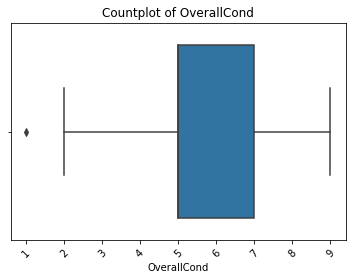

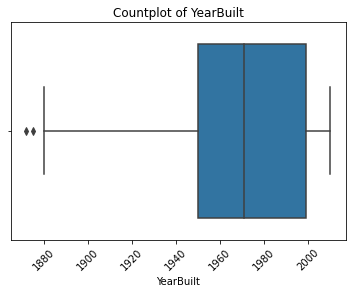

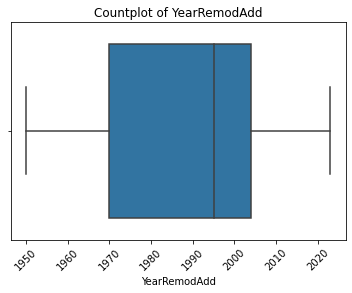

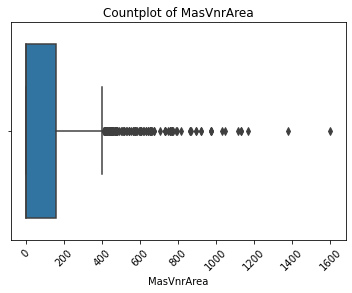

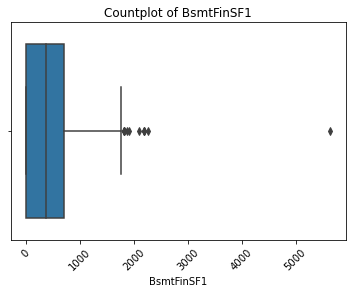

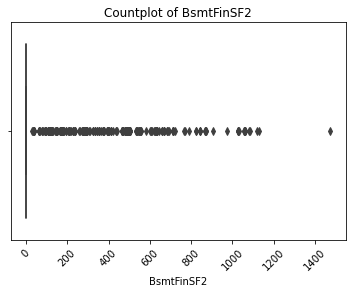

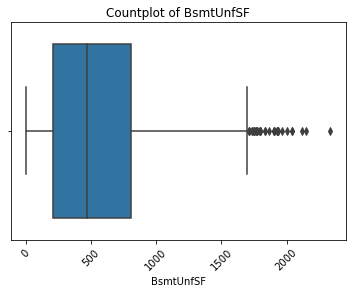

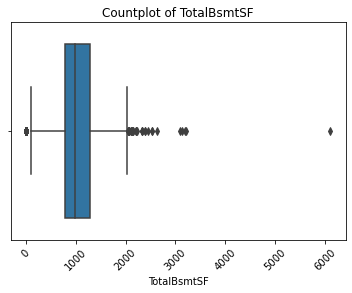

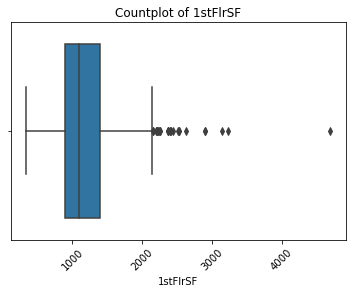

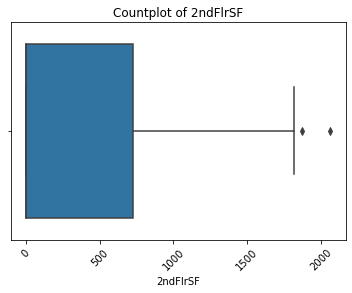

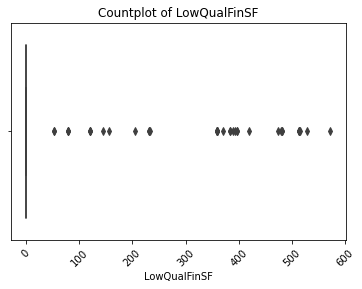

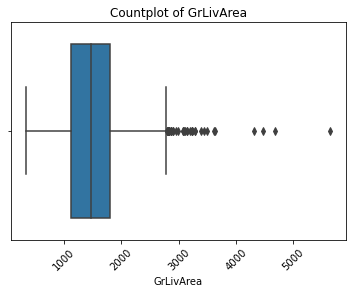

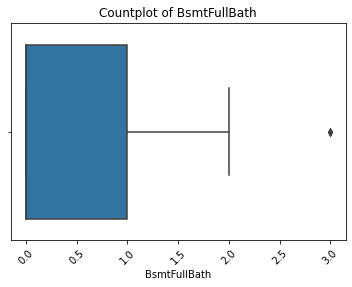

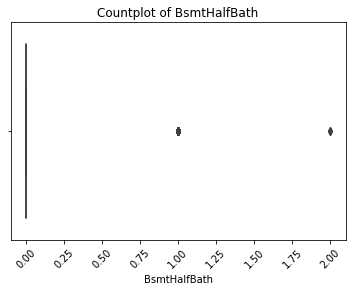

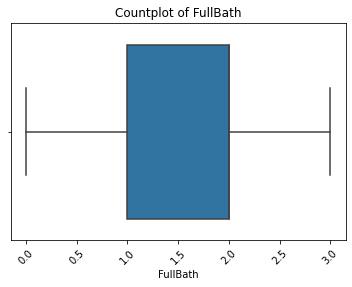

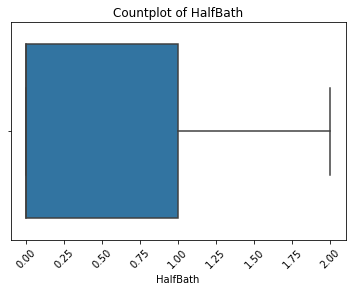

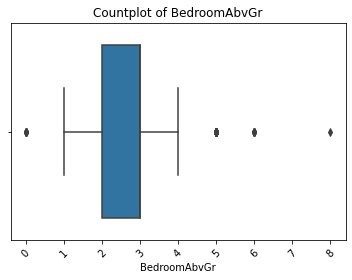

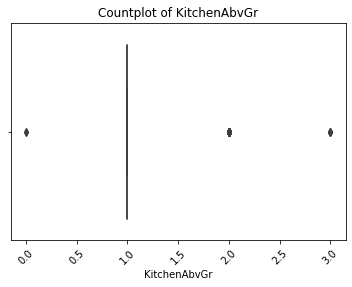

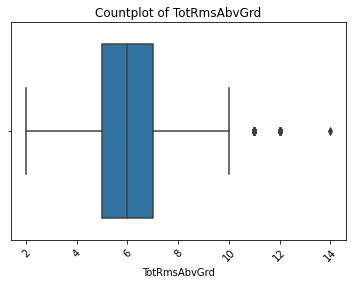

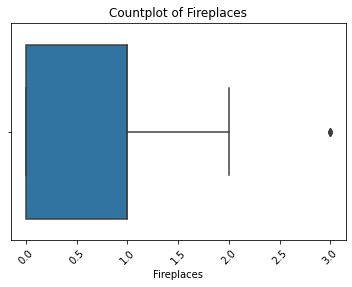

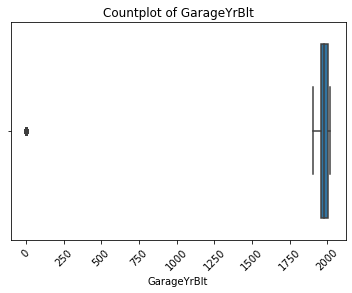

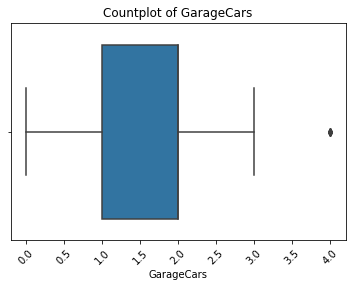

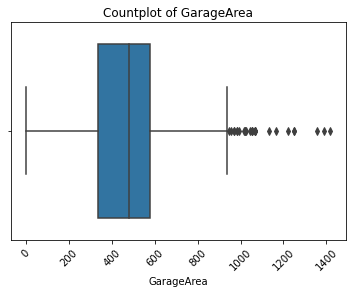

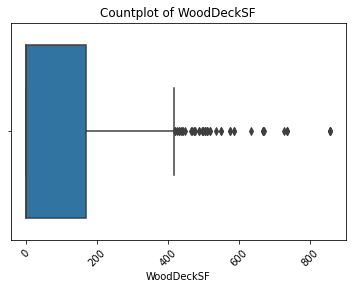

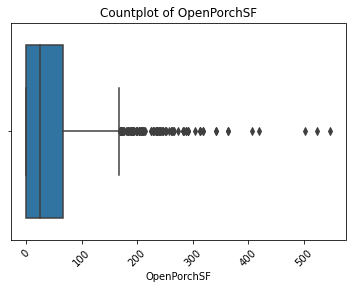

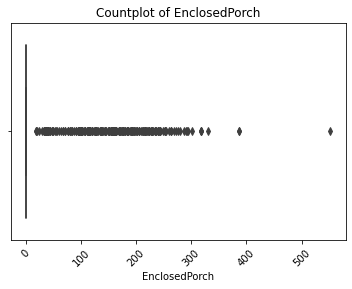

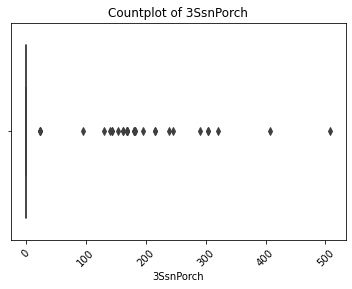

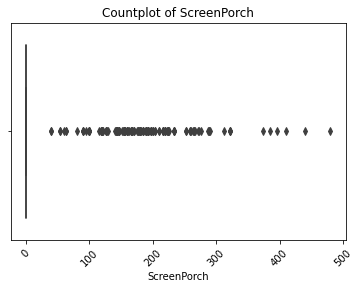

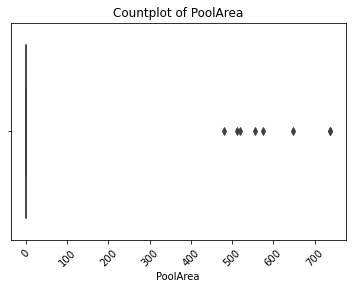

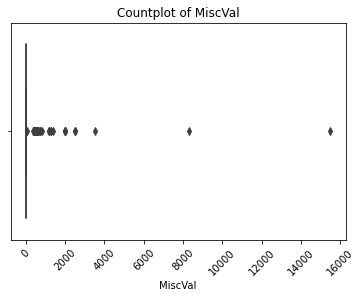

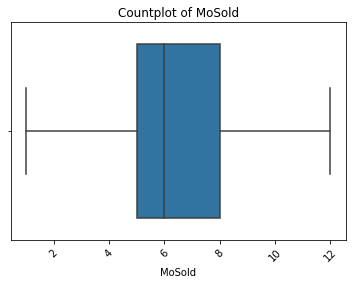

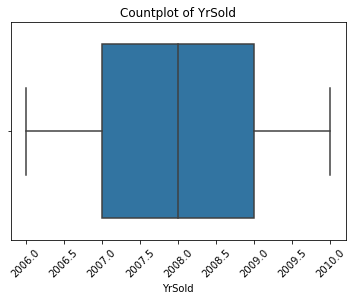

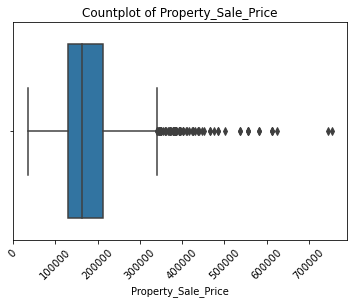

In [45]:
generate_boxplot(numeric_data)

In [46]:
def bivariate_analysis(dataframe):

    # Find all the numeric columns in the dataframe
    numeric_cols = dataframe.select_dtypes(include='number').columns

    # Find the target variable column
    target_col = dataframe.columns[-1]

    # Create a scatter plot with a regression line for each numeric column
    for col in numeric_cols[:-1]:
        sns.lmplot(x=col, y=target_col, data=dataframe)

        # Calculate and print the correlation coefficient
        corr_coef = dataframe[target_col].corr(dataframe[col])
        print(f"The correlation coefficient between {target_col} and {col} is: {corr_coef:.3f}")

The correlation coefficient between Property_Sale_Price and Dwell_Type is: -0.073
The correlation coefficient between Property_Sale_Price and LotFrontage is: 0.265
The correlation coefficient between Property_Sale_Price and LotArea is: 0.212
The correlation coefficient between Property_Sale_Price and OverallQual is: 0.524
The correlation coefficient between Property_Sale_Price and OverallCond is: -0.049
The correlation coefficient between Property_Sale_Price and YearBuilt is: 0.439
The correlation coefficient between Property_Sale_Price and YearRemodAdd is: 0.478
The correlation coefficient between Property_Sale_Price and MasVnrArea is: 0.480
The correlation coefficient between Property_Sale_Price and BsmtFinSF1 is: 0.372
The correlation coefficient between Property_Sale_Price and BsmtFinSF2 is: -0.035
The correlation coefficient between Property_Sale_Price and BsmtUnfSF is: 0.233
The correlation coefficient between Property_Sale_Price and TotalBsmtSF is: 0.618
The correlation coeffici

C:\Users\Sarkar\anaconda3\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


The correlation coefficient between Property_Sale_Price and BedroomAbvGr is: 0.161
The correlation coefficient between Property_Sale_Price and KitchenAbvGr is: -0.144
The correlation coefficient between Property_Sale_Price and TotRmsAbvGrd is: 0.524
The correlation coefficient between Property_Sale_Price and Fireplaces is: 0.468
The correlation coefficient between Property_Sale_Price and GarageYrBlt is: 0.251
The correlation coefficient between Property_Sale_Price and GarageCars is: 0.635
The correlation coefficient between Property_Sale_Price and GarageArea is: 0.622
The correlation coefficient between Property_Sale_Price and WoodDeckSF is: 0.327
The correlation coefficient between Property_Sale_Price and OpenPorchSF is: 0.346
The correlation coefficient between Property_Sale_Price and EnclosedPorch is: -0.108
The correlation coefficient between Property_Sale_Price and 3SsnPorch is: 0.053
The correlation coefficient between Property_Sale_Price and ScreenPorch is: 0.116
The correlation

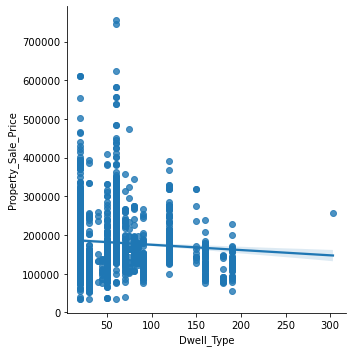

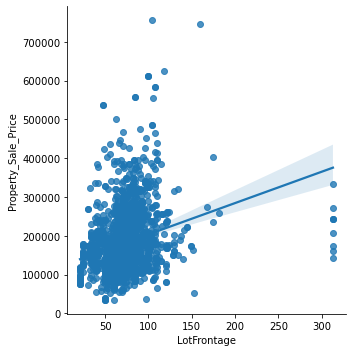

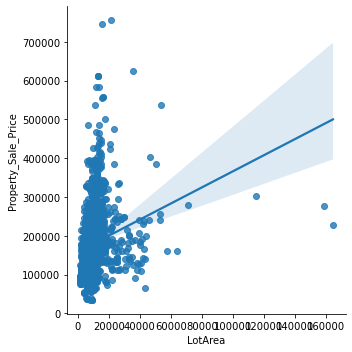

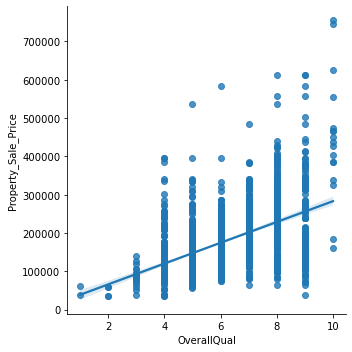

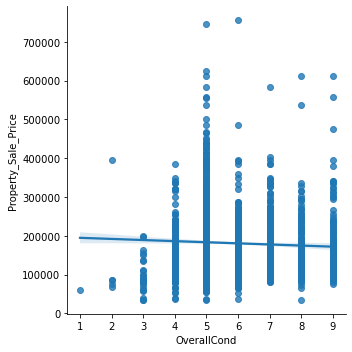

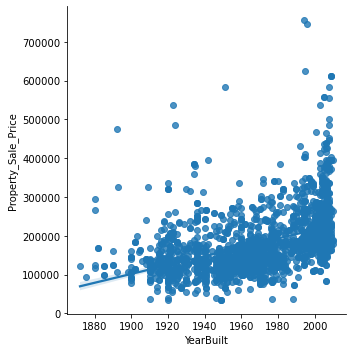

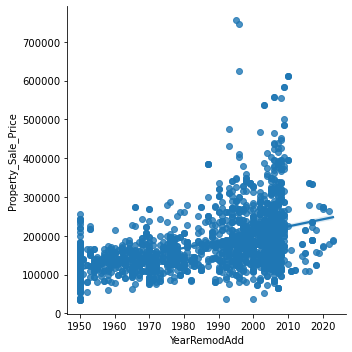

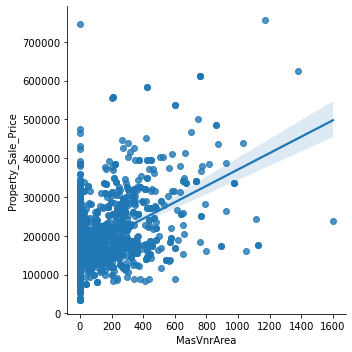

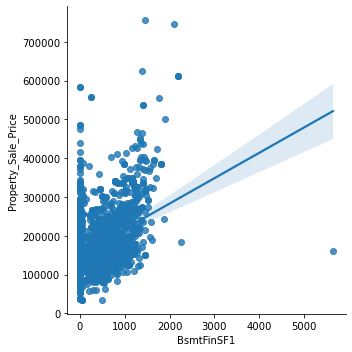

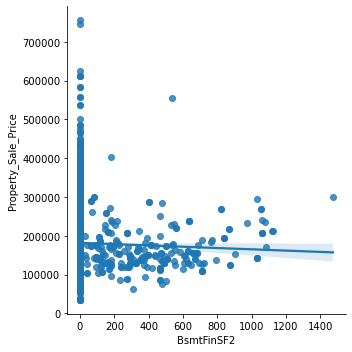

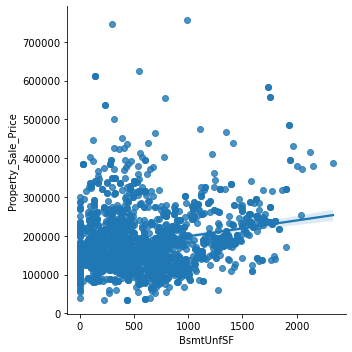

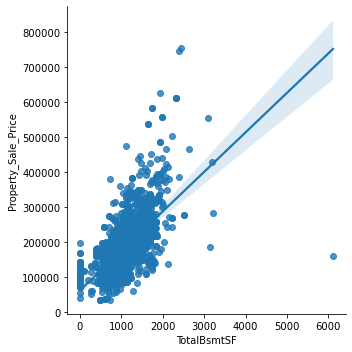

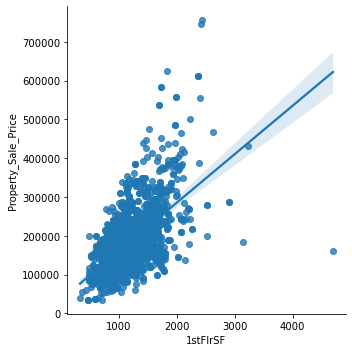

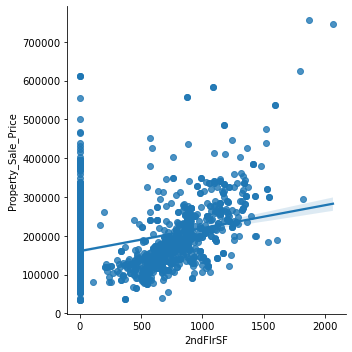

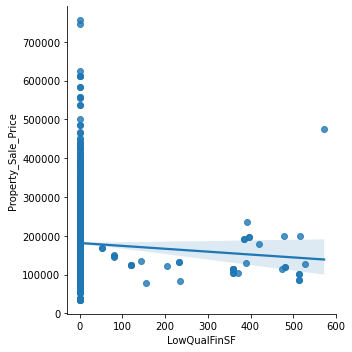

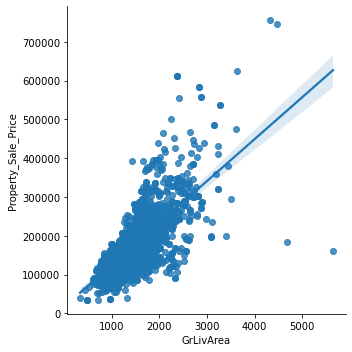

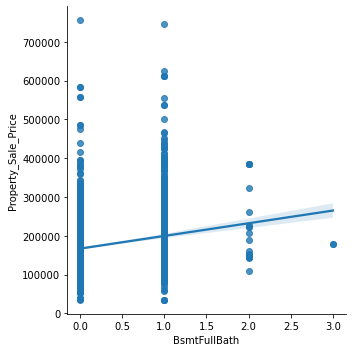

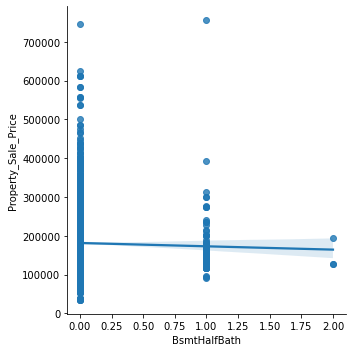

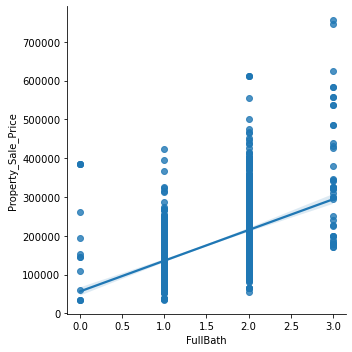

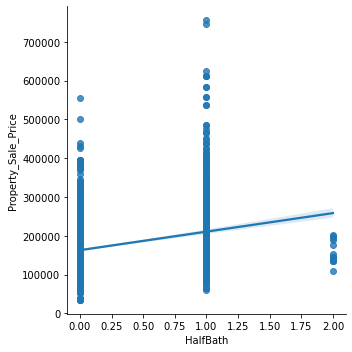

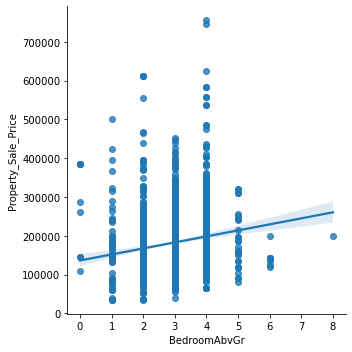

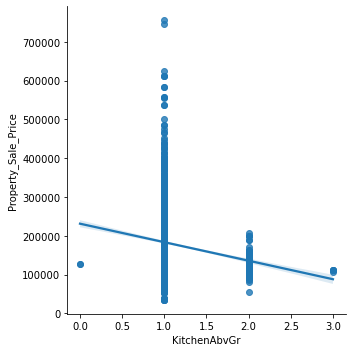

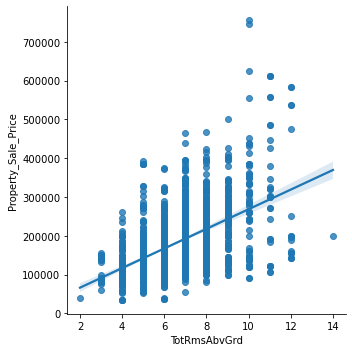

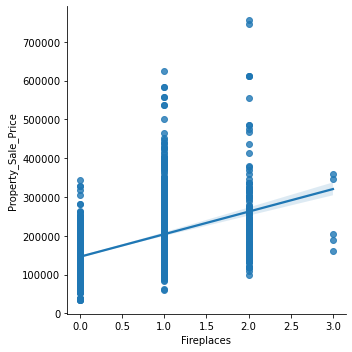

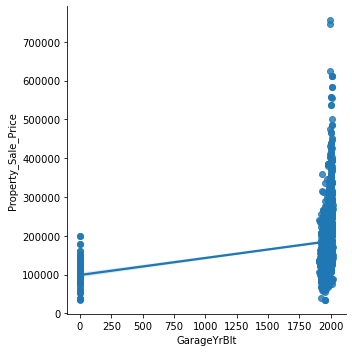

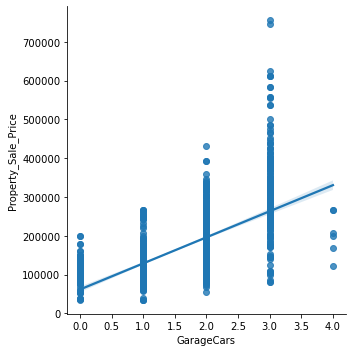

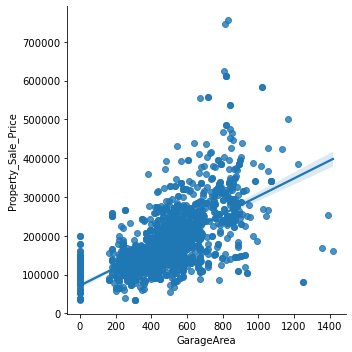

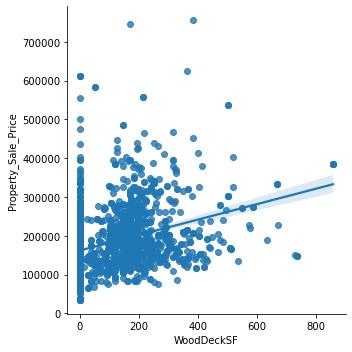

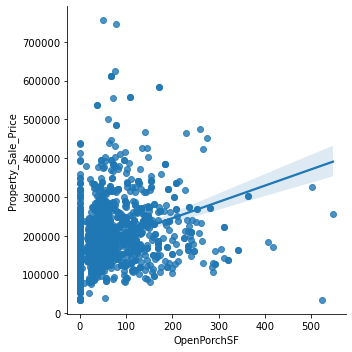

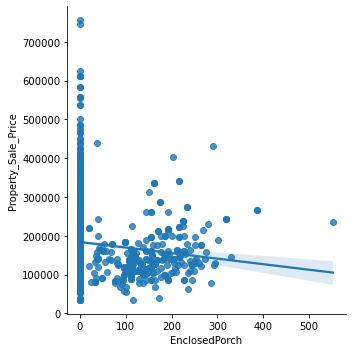

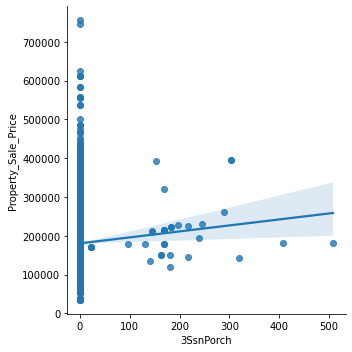

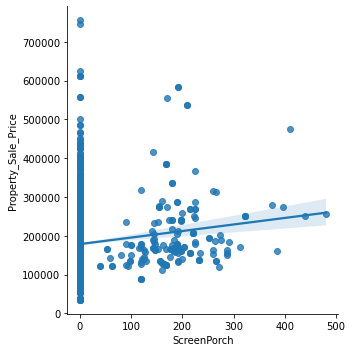

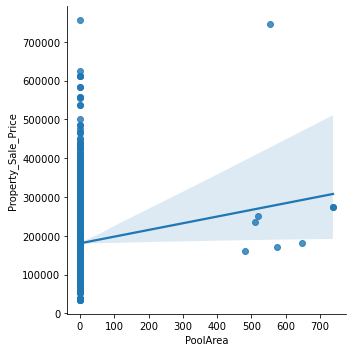

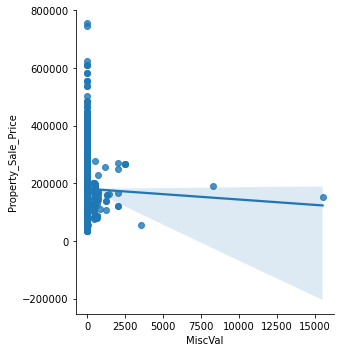

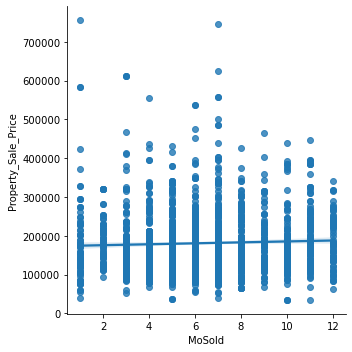

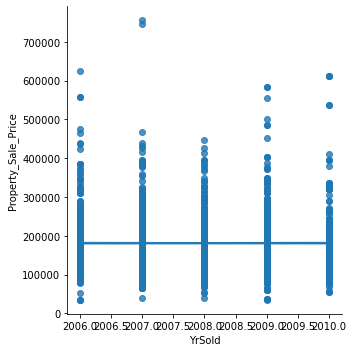

In [47]:
bivariate_analysis(numeric_data)

In [52]:
def bivariate_cat_analysis(dataframe):
    cat_cols = dataframe.select_dtypes(include='object').columns

    # Find the target variable column
    target_col = dataframe.columns[-1]

    # Create a scatter plot with a regression line for each numeric column
    for col in cat_cols:
        sns.stripplot(x=col, y=target_col, data=dataframe)
        plt.xticks(rotation = 45)
        plt.show()

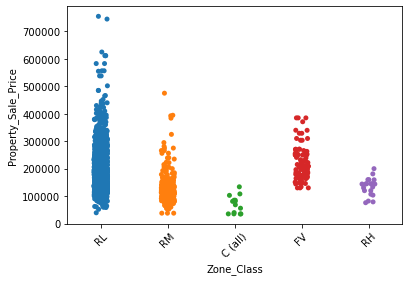

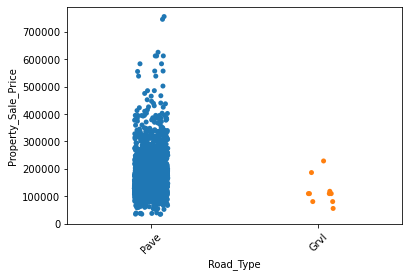

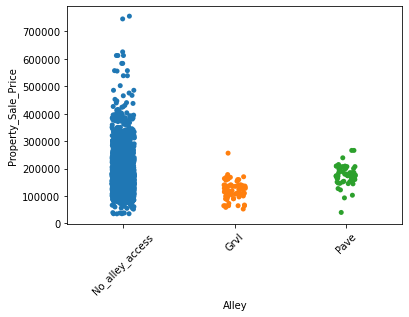

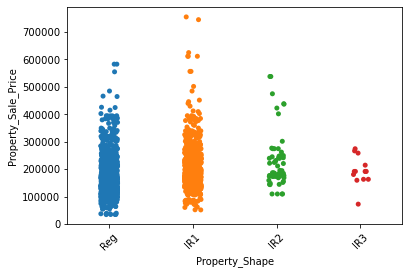

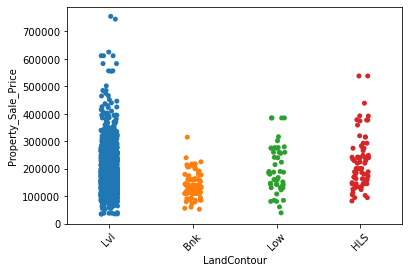

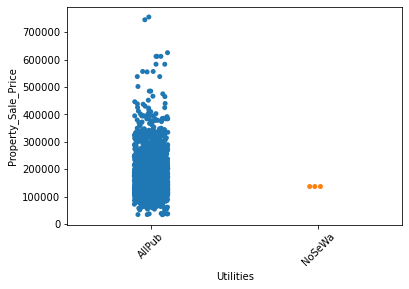

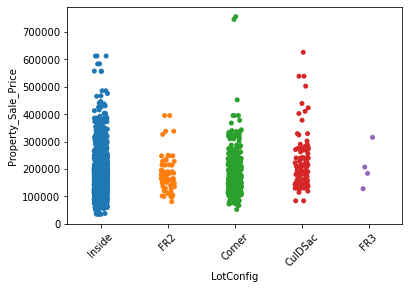

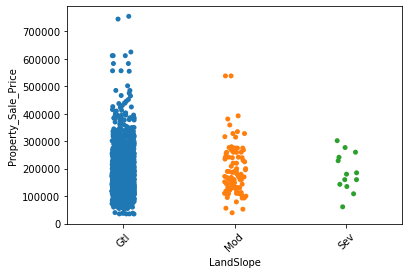

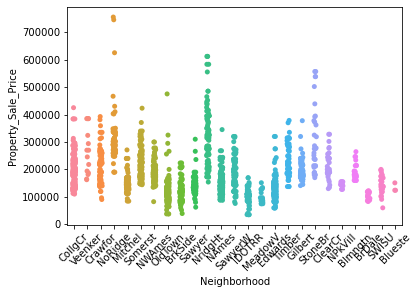

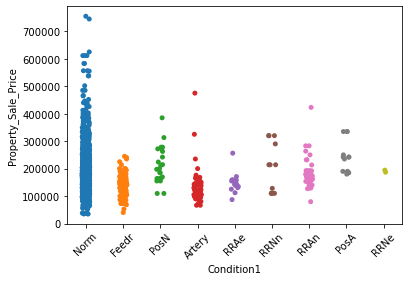

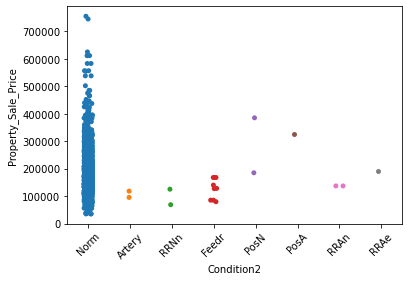

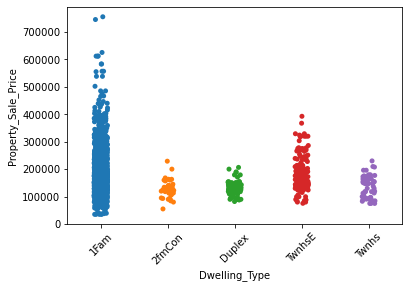

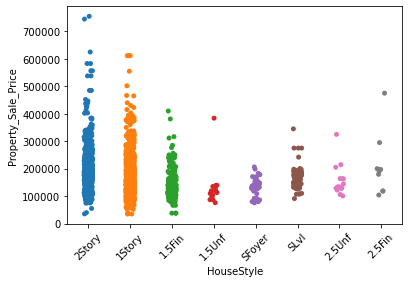

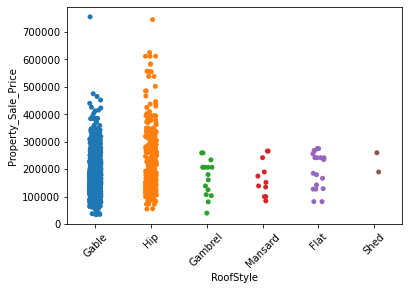

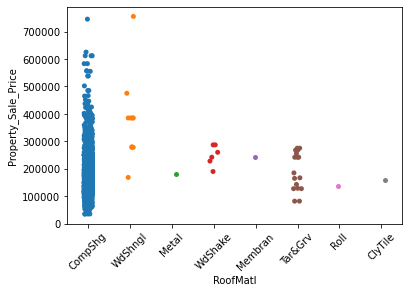

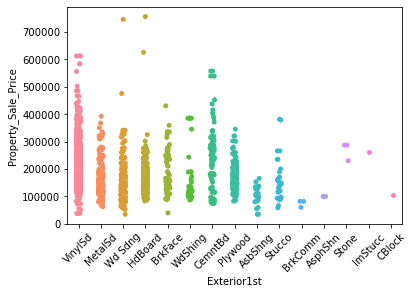

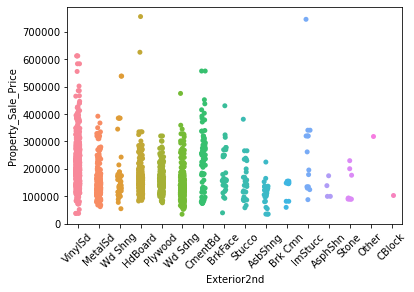

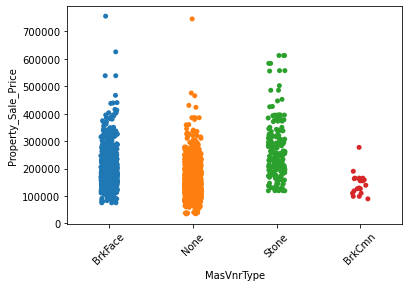

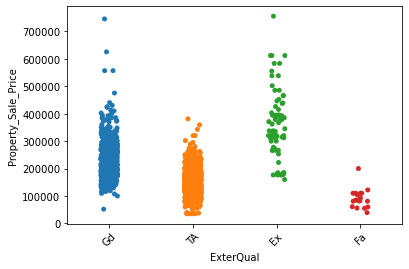

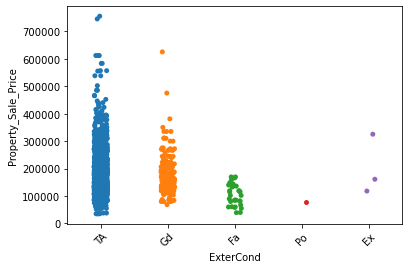

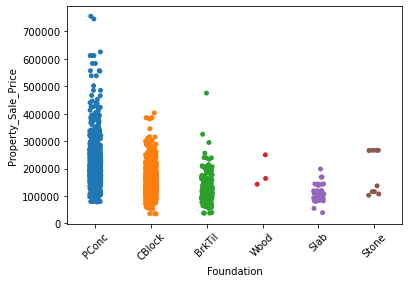

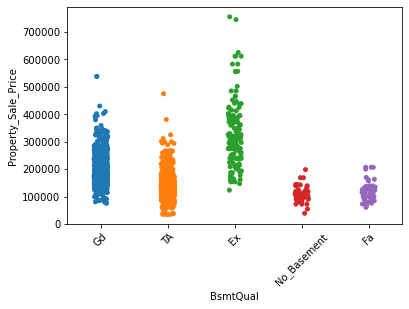

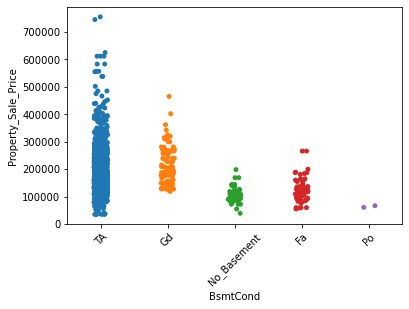

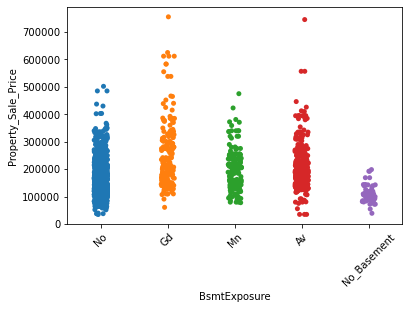

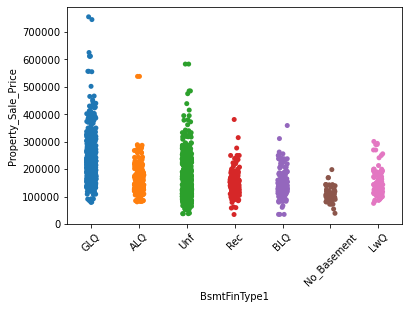

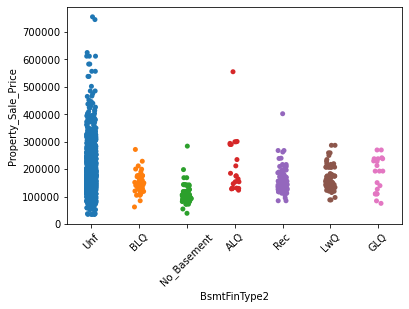

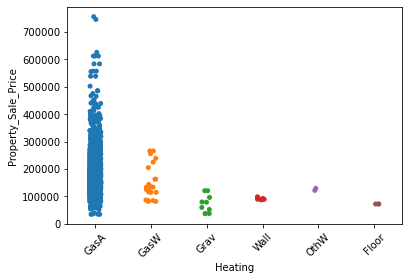

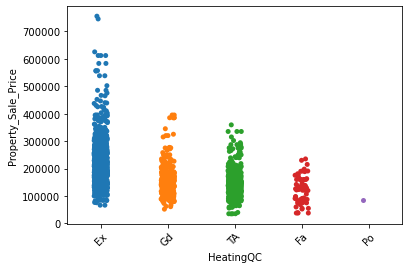

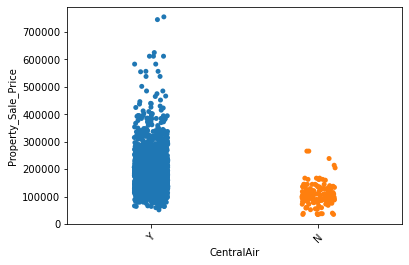

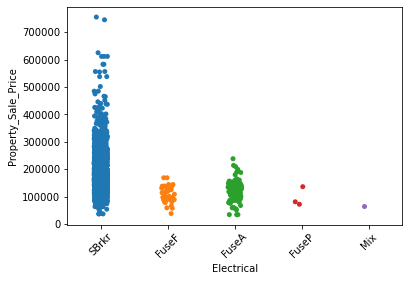

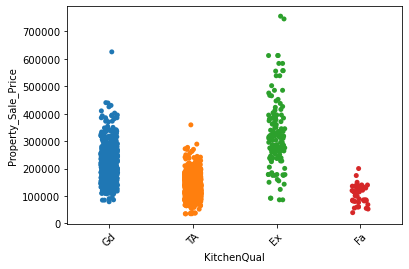

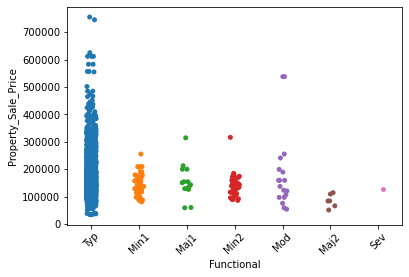

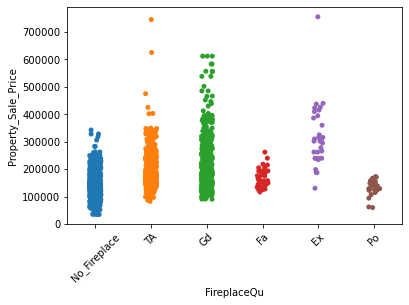

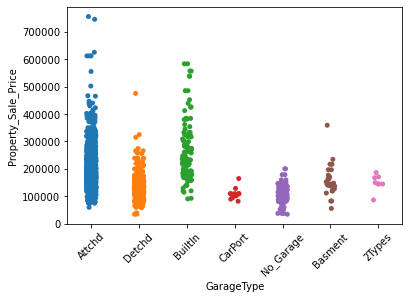

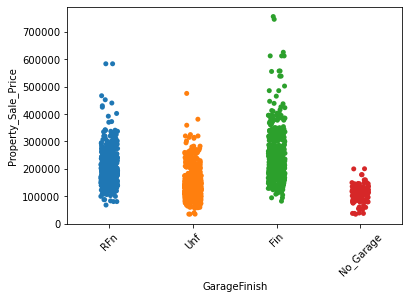

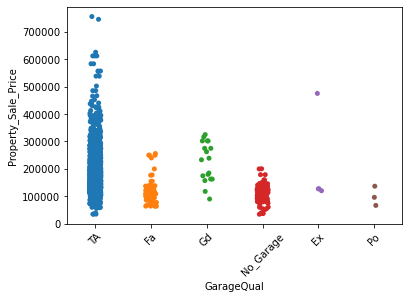

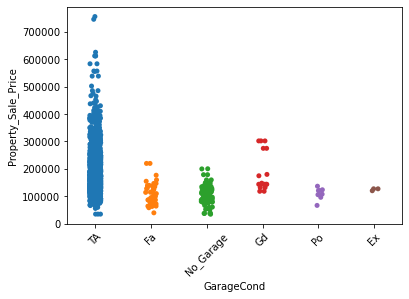

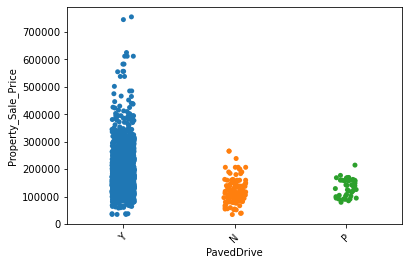

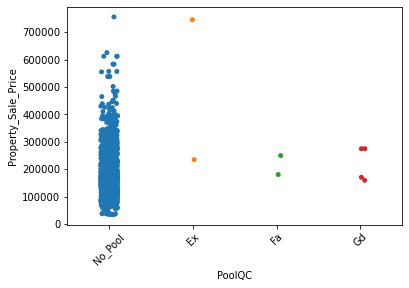

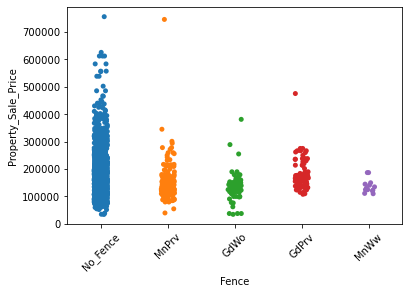

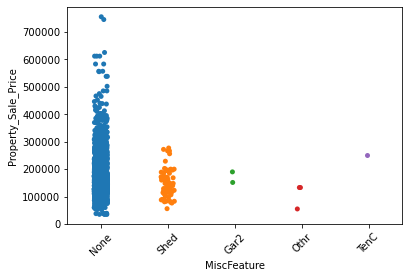

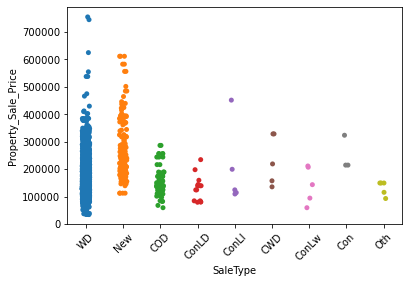

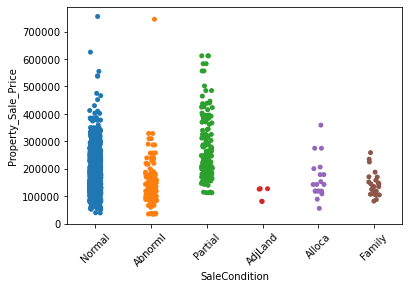

In [53]:
bivariate_cat_analysis(house)

In [74]:
#PoolQC,GarageCond,GarageQual,FireplaceQu,KitchenQual,CentralAir,HeatingQC,
#BsmtFinType2,BsmtFinType1,BsmtExposure,BsmtCond,BsmtQual,ExterCond,ExterQual,
#Alley,Road_Type,Functional,GarageFinish,PavedDrive

house = house.replace({'PoolQC':{'Ex' : 4,'Gd' : 3 ,'TA' : 2,'Fa' : 1,'No_Pool' : 0}})
house = house.replace({'GarageCond':{'Ex' : 5,'Gd' : 4,'TA' : 3,'Fa' : 2,'Po' : 1,'No_Garage' : 0}})
house = house.replace({'GarageQual':{'Ex' : 5,'Gd' : 4,'TA' : 3,'Fa' : 2,'Po' : 1,'No_Garage' : 0}})
house = house.replace({'FireplaceQu':{'Ex' : 5,'Gd' : 4,'TA' : 3,'Fa' : 2,'Po' : 1,'No_Fireplace' : 0}})
house = house.replace({'KitchenQual':{'Ex' : 5,'Gd' : 4,'TA' : 3,'Fa' : 2,'Po' : 1}})
house = house.replace({'CentralAir':{'Y' : 1,'N' : 0}})
house = house.replace({'HeatingQC':{'Ex' : 5,'Gd' : 4,'TA' : 3,'Fa' : 2,'Po' : 1}})
house = house.replace({'BsmtFinType2':{'GLQ' : 6,'ALQ' : 5,'BLQ' : 4,'Rec' : 3,'LwQ' : 2,'Unf' : 1,'No_Basement' : 0}})
house = house.replace({'BsmtFinType1':{'GLQ' : 6,'ALQ' : 5,'BLQ' : 4,'Rec' : 3,'LwQ' : 2,'Unf' : 1,'No_Basement' : 0}})
house = house.replace({'BsmtExposure':{'Gd' : 4,'Av' : 3,'Mn' : 2,'No' : 1,'No_Basement' : 0}})
house = house.replace({'BsmtCond':{'Ex' : 5,'Gd' : 4,'TA' : 3,'Fa' : 2,'Po' : 1,'No_Basement' : 0}})
house = house.replace({'BsmtQual':{'Ex' : 5,'Gd' : 4,'TA' : 3,'Fa' : 2,'Po' : 1,'No_Basement' : 0}})
house = house.replace({'ExterCond':{'Ex' : 5,'Gd' : 4,'TA' : 3,'Fa' : 2,'Po' : 1}})
house = house.replace({'ExterQual':{'Ex' : 5,'Gd' : 4,'TA' : 3,'Fa' : 2,'Po' : 1}})
house = house.replace({'Alley':{'Pave' : 2,'Grvl' : 1,'No_alley_access' : 0}})
house = house.replace({'Road_Type':{'Pave' : 1,'Grvl' : 0}})
house = house.replace({'Functional':{'Typ' : 7,'Min1' : 6, 'Min2' : 5, 'Mod' : 4,'Maj1' : 3,'Maj2' : 2,'Sev' : 1,'Sal' : 0}})
house = house.replace({'GarageFinish':{'Fin' : 3,'RFn' : 2,'Unf' : 1,'No_Garage' : 0}})
house = house.replace({'PavedDrive':{'Y' : 2,'P' : 1,'N' : 0}})

In [81]:
house1=pd.get_dummies(house,drop_first=True)

In [82]:
house1.shape

(2067, 208)